<a href="https://colab.research.google.com/github/abuabdurahman82/MLOps-Basics/blob/main/AAI_511_Group5_final_project_classical_music_composer_identification_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Load and prepare the dataset

### Subtask:
Access the dataset located in "/content/drive/MyDrive/MS AAI/AAI 511/Final Project/AAI 511" and filter it to include only the musical scores from Bach, Beethoven, Chopin, and Mozart.


In [ ]:
import os
import shutil

# Define the path to the dataset on Google Drive
dataset_path = '/content/drive/MyDrive/MS AAI/AAI 511/Final Project/AAI 511'

# Define the list of composers to keep
composers_to_keep = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

# Create a directory for the filtered dataset
filtered_dataset_path = './filtered_classical_midi'
os.makedirs(filtered_dataset_path, exist_ok=True)

# Iterate through the dataset and copy the files for the desired composers
for composer_name in composers_to_keep:
    composer_path = os.path.join(dataset_path, composer_name)
    if os.path.exists(composer_path):
        output_composer_path = os.path.join(filtered_dataset_path, composer_name)
        os.makedirs(output_composer_path, exist_ok=True)
        for filename in os.listdir(composer_path):
            if filename.endswith('.midi') or filename.endswith('.mid'):
                src_file = os.path.join(composer_path, filename)
                dest_file = os.path.join(output_composer_path, filename)
                shutil.copy2(src_file, dest_file) # Use shutil.copy2 to preserve metadata
    else:
        print(f"Composer directory not found: {composer_path}")


print(f"Filtered dataset created in: {filtered_dataset_path}")

Composer directory not found: /content/drive/MyDrive/MS AAI/AAI 511/Final Project/AAI 511/Bach
Composer directory not found: /content/drive/MyDrive/MS AAI/AAI 511/Final Project/AAI 511/Beethoven
Composer directory not found: /content/drive/MyDrive/MS AAI/AAI 511/Final Project/AAI 511/Chopin
Composer directory not found: /content/drive/MyDrive/MS AAI/AAI 511/Final Project/AAI 511/Mozart
Filtered dataset created in: ./filtered_classical_midi


In [ ]:
import os

# Define the path to the dataset on Google Drive
dataset_path = '/content/drive/MyDrive/MS AAI/AAI 511/Final Project/AAI 511'

# List the contents of the dataset directory
if os.path.exists(dataset_path):
    print(f"Contents of {dataset_path}:")
    for item in os.listdir(dataset_path):
        print(item)
else:
    print(f"Dataset path not found: {dataset_path}")

Contents of /content/drive/MyDrive/MS AAI/AAI 511/Final Project/AAI 511:
Tchaicovsky Waltz of the Flowers.MID
Rothchild Symphony Rmw12 2mov.mid
Tchaikovsky Lake Of The Swans Act 1 1mov.mid
Rothchlid Symphony Rmw12 3mov.mid
Sibelius Kuolema Vals op44.mid
Tchaikovsky Lake Of The Swans Act 2 11mov.mid
Wagner Ride of the valkyries.mid
Tchaikovsky Lake Of The Swans Act 1 4mov.mid
Tchaikovsky Lake Of The Swans Act 1 9mov.mid
Tchaikovsky Lake Of The Swans Act 2 12mov.mid
Tchaikovsky Lake Of The Swans Act 1 2mov.mid
Tchaikovsky Lake Of The Swans Act 1 5mov.mid
Tchaikovsky Lake Of The Swans Act 1 6mov.mid
Tchaikovsky Lake Of The Swans Act 2 13mov.mid
Tchaikovsky Lake Of The Swans Act 2 10mov.mid
Tchaikovsky Lake Of The Swans Act 1 3mov.mid
Tchaikovsky Lake Of The Swans Act 2 14mov.mid
Tchaikovsky Lake Of The Swans Act 1 7-8movs.mid
midiclassics.zip
.DS_Store
Arndt
Albéniz
Ambroise
Arensky
Alkan
midiclassics


**Explanation**:
The output of the previous command shows that the dataset is not organized into subdirectories by composer within the specified path. Instead, there's a `midiclassics` subdirectory which likely contains the actual composer folders, and a `midiclassics.zip` file which might be the original downloaded data. We  need to access the files within the `midiclassics` subdirectory, then filter and copy the MIDI files from the specified composers to the new filtered dataset directory.



In [ ]:
import os
import shutil

# Define the path to the dataset on Google Drive
dataset_path = '/content/drive/MyDrive/MS AAI/AAI 511/Final Project/AAI 511/midiclassics'

# Define the list of composers to keep
composers_to_keep = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

# Create a directory for the filtered dataset
filtered_dataset_path = './filtered_classical_midi'
os.makedirs(filtered_dataset_path, exist_ok=True)

# Iterate through the dataset and copy the files for the desired composers
for composer_name in composers_to_keep:
    composer_path = os.path.join(dataset_path, composer_name)
    if os.path.exists(composer_path):
        output_composer_path = os.path.join(filtered_dataset_path, composer_name)
        os.makedirs(output_composer_path, exist_ok=True)
        for filename in os.listdir(composer_path):
            if filename.endswith('.midi') or filename.endswith('.mid'):
                src_file = os.path.join(composer_path, filename)
                dest_file = os.path.join(output_composer_path, filename)
                shutil.copy2(src_file, dest_file) # Use shutil.copy2 to preserve metadata
    else:
        print(f"Composer directory not found within midiclassics: {composer_path}")

print(f"Filtered dataset created in: {filtered_dataset_path}")

Filtered dataset created in: ./filtered_classical_midi


## Step 2: Perform exploratory data analysis (EDA)

### Subtask:
Analyze the filtered dataset to understand its characteristics, such as the number of files per composer, the distribution of musical events, and typical sequence lengths.

In [ ]:
import os
import numpy as np

# Path to the filtered dataset
filtered_dataset_path = './filtered_classical_midi'

# Count files per composer
composer_file_counts = {}
total_files = 0
print("Number of files per composer:")
for composer_name in os.listdir(filtered_dataset_path):
    composer_path = os.path.join(filtered_dataset_path, composer_name)
    if os.path.isdir(composer_path):
        midi_files = [f for f in os.listdir(composer_path) if f.endswith('.midi') or f.endswith('.mid')]
        count = len(midi_files)
        composer_file_counts[composer_name] = count
        total_files += count
        print(f"{composer_name}: {count}")

print(f"\nTotal number of files in the filtered dataset: {total_files}")


Number of files per composer:
Mozart: 90
Beethoven: 133
Bach: 122
Chopin: 136

Total number of files in the filtered dataset: 481


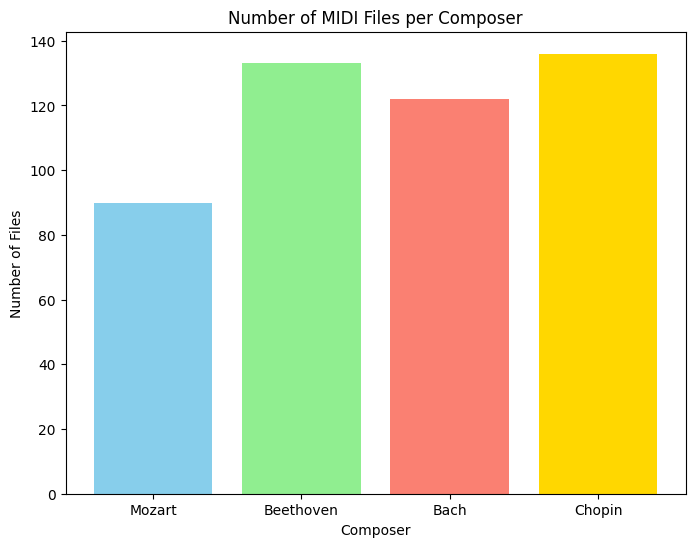

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the number of files per composer
composer_names = list(composer_file_counts.keys())
file_counts = list(composer_file_counts.values())

plt.figure(figsize=(8, 6))
plt.bar(composer_names, file_counts, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.title('Number of MIDI Files per Composer')
plt.xlabel('Composer')
plt.ylabel('Number of Files')
plt.show()


## Step 3: Preprocess the data

### Subtask:
Convert the MIDI files into a format suitable for deep learning models (e.g., musical notes, sequences, or piano rolls). This may involve extracting features from the MIDI data.


**Explanation**:
Install the `music21` library using pip.



In [ ]:
!pip install music21

**Explanation**:
Create a function to parse MIDI files, extract musical events, and represent them as sequences, then iterate through the filtered dataset to process the MIDI files and store the sequences and labels.



/usr/local/lib/python3.11/dist-packages/music21/stream/base.py:3689: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)
/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'\x8b\xc8\x82\xcc\x95\\\x91\xe8'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=11, channel=None, data=b'\xa9 June 2000'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Fl\xf6te-Konzert Nr. 2'>; getting generic Instrument
  warni

Parsed 481 MIDI files.

Analysis of Sequence Lengths:
Minimum length: 106
Maximum length: 43224
Mean length: 4260.44
Median length: 1935.00


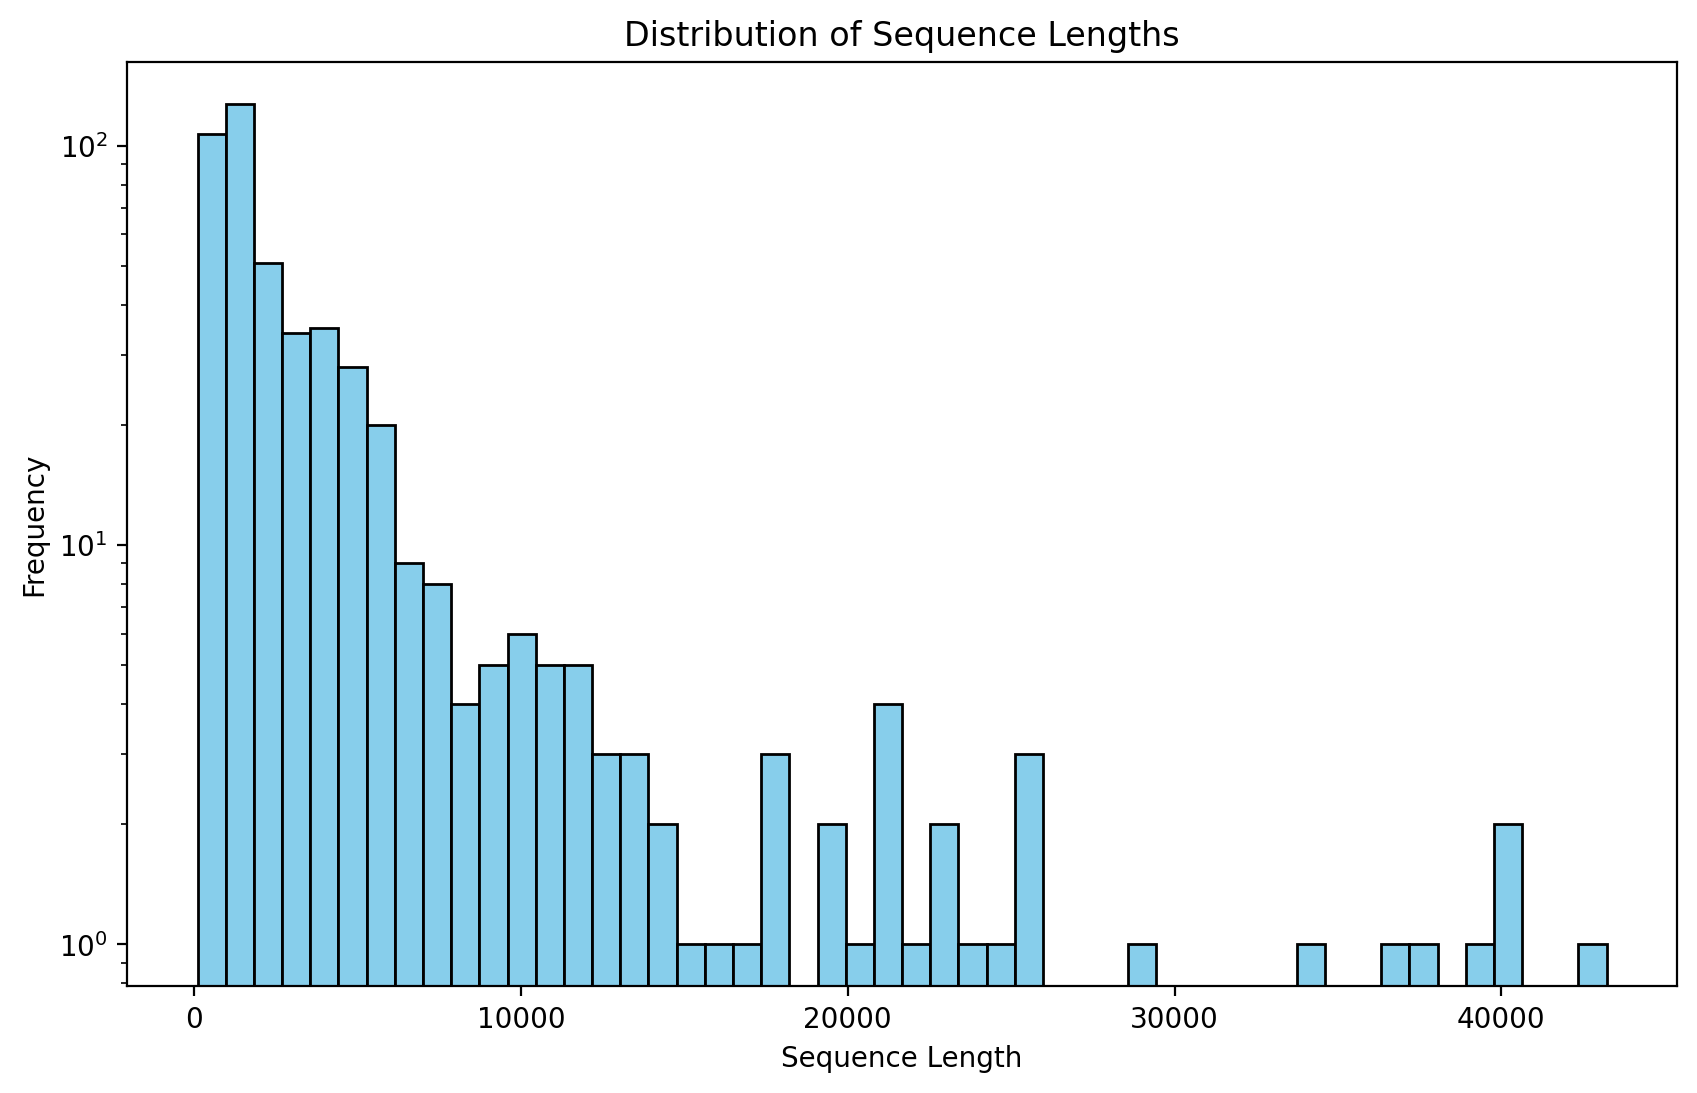

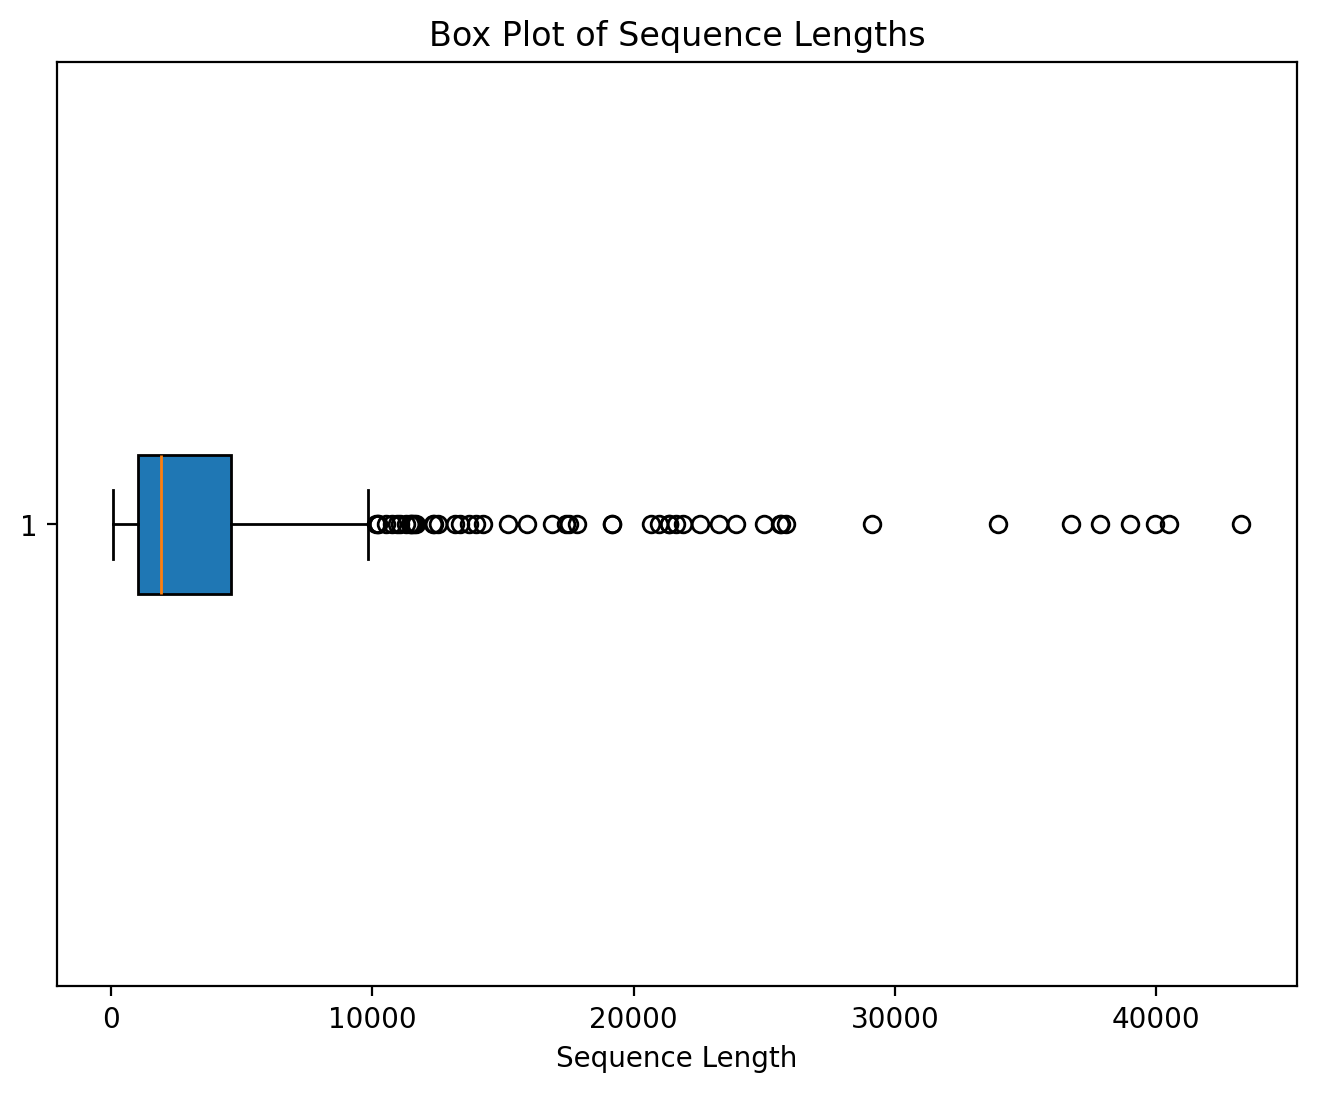

In [ ]:
import music21
import os
import numpy as np
import matplotlib.pyplot as plt

# Function to parse a single MIDI file and extract a sequence of events
def parse_midi(file_path):
    try:
        midi_stream = music21.converter.parse(file_path)
        elements_to_parse = midi_stream.flat.notesAndRests

        sequence = []
        for element in elements_to_parse:
            if isinstance(element, music21.note.Note):
                sequence.append(str(element.pitch))
            elif isinstance(element, music21.chord.Chord):
                sequence.append('.'.join(str(n) for n in element.normalOrder))
            elif isinstance(element, music21.note.Rest):
                sequence.append('rest')
        return sequence
    except Exception as e:
        print(f"Error parsing {file_path}: {e}")
        return None

# Path to the filtered dataset
filtered_dataset_path = './filtered_classical_midi'

# Lists to store sequences and labels
all_sequences = []
all_labels = []
composer_to_label = {'Bach': 0, 'Beethoven': 1, 'Chopin': 2, 'Mozart': 3}

# Iterate through the filtered dataset and process each MIDI file
for composer_name in os.listdir(filtered_dataset_path):
    composer_path = os.path.join(filtered_dataset_path, composer_name)
    if os.path.isdir(composer_path) and composer_name in composer_to_label:
        label = composer_to_label[composer_name]
        for filename in os.listdir(composer_path):
            if filename.endswith('.midi') or filename.endswith('.mid'):
                file_path = os.path.join(composer_path, filename)
                sequence = parse_midi(file_path)
                if sequence:
                    all_sequences.append(sequence)
                    all_labels.append(label)

print(f"Parsed {len(all_sequences)} MIDI files.")

# Analyze sequence lengths
sequence_lengths = [len(seq) for seq in all_sequences]
min_length = np.min(sequence_lengths)
max_length = np.max(sequence_lengths)
mean_length = np.mean(sequence_lengths)
median_length = np.median(sequence_lengths)

print("\nAnalysis of Sequence Lengths:")
print(f"Minimum length: {min_length}")
print(f"Maximum length: {max_length}")
print(f"Mean length: {mean_length:.2f}")
print(f"Median length: {median_length:.2f}")

# Visualize the distribution of sequence lengths using a histogram
plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.yscale('log') # Use log scale for better visualization due to large range
plt.show()

# Optional: Box plot for sequence lengths to show quartiles and outliers
plt.figure(figsize=(8, 6))
plt.boxplot(sequence_lengths, vert=False, patch_artist=True)
plt.title('Box Plot of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.show()

**Explanation**:
Determine a suitable fixed sequence length and convert the sequences into a numerical format using integer mapping, then store them as NumPy arrays.



In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from collections import Counter # Import Counter

# Create a vocabulary of all unique musical events
all_events = [event for sequence in all_sequences for event in sequence]
unique_events = sorted(list(set(all_events)))
event_to_int = {event: i for i, event in enumerate(unique_events)}
int_to_event = {i: event for event, i in event_to_int.items()}

# Convert sequences to numerical sequences
numerical_sequences = [[event_to_int[event] for event in sequence] for sequence in all_sequences]

# Determine a suitable fixed sequence length (e.g., the median length or a fixed number)
# For simplicity, let's use a fixed length, you might need to experiment with this
max_sequence_length = 500 # Example fixed length

# Pad or truncate sequences to the fixed length
padded_sequences = pad_sequences(numerical_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Convert labels to NumPy array
labels_array = np.array(all_labels)

# Display shapes of the resulting arrays
print("Shape of padded sequences:", padded_sequences.shape)
print("Shape of labels array:", labels_array.shape)
print("Number of unique musical events:", len(unique_events))
vocab_size = len(unique_events) # Define vocab_size here

# Analyze distribution of musical events (vocab_size is already calculated)
print(f"\nNumber of unique musical events (vocabulary size): {vocab_size}")

# Optional: Print the most frequent events (requires counting, can be resource intensive for large datasets)
event_counts = Counter(all_events)
print("\nMost common musical events:")
for event, count in event_counts.most_common(10): # Print top 10 most common
    print(f"{event}: {count}")


# Optionally, split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels_array, test_size=0.2, random_state=42)

Shape of padded sequences: (481, 500)
Shape of labels array: (481,)
Number of unique musical events: 1086

Number of unique musical events (vocabulary size): 1086

Most common musical events:
rest: 734122
G4: 42857
D4: 41154
D5: 36718
A4: 36059
C4: 35801
G3: 35175
C5: 34660
E4: 31352
A3: 30684


## Step 4: Split the dataset

### Subtask:
Split the prepared data into training, validation, and test sets.


**Reasoning**:
Import the necessary function for splitting the data and perform the train-validation-test split as instructed.



In [ ]:
### Subtask:
# Create proper train/validation/test splits with stratification to ensure balanced class distribution

from sklearn.model_selection import train_test_split
import numpy as np

print("="*60)
print("CREATING TRAIN/VALIDATION/TEST SPLITS")
print("="*60)

# First, ensure we have the processed data from Step 3
print(f"Total sequences processed: {len(all_sequences)}")
print(f"Total labels: {len(all_labels)}")

# Convert sequences to padded arrays (if not already done)
# [Keep your existing padding code here if you have it]

# Create stratified splits
# First split: separate test set (20% of total data)
X_temp, X_test, y_temp, y_test = train_test_split(
    padded_sequences, labels_array,  # Use your processed data variables
    test_size=0.2,        # 20% for testing
    random_state=42,      # For reproducibility
    stratify=labels_array    # Maintain class distribution
)

# Second split: divide remaining data into train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,       # 25% of remaining 80% = 20% of total for validation
    random_state=42,
    stratify=y_temp
)

# Print split information
print(f"Training set size: {len(X_train)} ({len(X_train)/len(padded_sequences)*100:.1f}%)")
print(f"Validation set size: {len(X_val)} ({len(X_val)/len(padded_sequences)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(padded_sequences)*100:.1f}%)")

# Check class distribution in each split
composer_names = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

print("\n📊 Class distribution in each split:")
print("Training set:")
train_counts = np.bincount(y_train)
for i, composer in enumerate(composer_names):
    print(f"  {composer}: {train_counts[i]} samples ({train_counts[i]/len(y_train)*100:.1f}%)")

print("Validation set:")
val_counts = np.bincount(y_val)
for i, composer in enumerate(composer_names):
    print(f"  {composer}: {val_counts[i]} samples ({val_counts[i]/len(y_val)*100:.1f}%)")

print("Test set:")
test_counts = np.bincount(y_test)
for i, composer in enumerate(composer_names):
    print(f"  {composer}: {test_counts[i]} samples ({test_counts[i]/len(y_test)*100:.1f}%)")

print("\n✅ Data splits created successfully!")
print("📝 Note: Test set will be used ONLY for final evaluation, not during training")

CREATING TRAIN/VALIDATION/TEST SPLITS
Total sequences processed: 481
Total labels: 481
Training set size: 288 (59.9%)
Validation set size: 96 (20.0%)
Test set size: 97 (20.2%)

📊 Class distribution in each split:
Training set:
  Bach: 73 samples (25.3%)
  Beethoven: 79 samples (27.4%)
  Chopin: 82 samples (28.5%)
  Mozart: 54 samples (18.8%)
Validation set:
  Bach: 24 samples (25.0%)
  Beethoven: 27 samples (28.1%)
  Chopin: 27 samples (28.1%)
  Mozart: 18 samples (18.8%)
Test set:
  Bach: 25 samples (25.8%)
  Beethoven: 27 samples (27.8%)
  Chopin: 27 samples (27.8%)
  Mozart: 18 samples (18.6%)

✅ Data splits created successfully!
📝 Note: Test set will be used ONLY for final evaluation, not during training


## Step 5: Build the lstm model

### Subtask:
Design and implement an LSTM-based deep learning model for composer classification.


**Explanation**:
Design and implement an LSTM-based deep learning model for composer classification by importing necessary layers and models from TensorFlow and Keras, defining vocabulary size and number of output classes, instantiating a Sequential model, adding Embedding, LSTM, Dropout, and Dense layers, compiling the model, and printing the model summary.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the vocabulary size
vocab_size = len(event_to_int)

# Define the number of output classes (number of unique composers)
num_classes = len(composer_to_label) # Assuming composer_to_label contains all unique composers

# Instantiate a Sequential model
lstm_model = Sequential()

# Add an Embedding layer
embedding_dim = 100 # You can experiment with this value
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))

# Add an LSTM layer
lstm_units = 128 # You can experiment with this value
lstm_model.add(LSTM(units=lstm_units, return_sequences=False))

# Add a Dropout layer
dropout_rate = 0.3 # You can experiment with this value
lstm_model.add(Dropout(rate=dropout_rate))

# Add a Dense layer for output
lstm_model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
lstm_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Explanation**:
The model summary shows that the parameters are not built yet because the input shape has not been provided implicitly by the first layer. The previous output also warns that `input_length` is deprecated. I will rebuild the model without the `input_length` argument in the Embedding layer to address the warning and allow the model to build properly.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the vocabulary size
vocab_size = len(event_to_int)

# Define the number of output classes (number of unique composers)
num_classes = len(composer_to_label) # Assuming composer_to_label contains all unique composers

# Instantiate a Sequential model
lstm_model = Sequential()

# Add an Embedding layer
embedding_dim = 100 # You can experiment with this value
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))

# Add an LSTM layer
lstm_units = 128 # You can experiment with this value
lstm_model.add(LSTM(units=lstm_units, return_sequences=False))

# Add a Dropout layer
dropout_rate = 0.3 # You can experiment with this value
lstm_model.add(Dropout(rate=dropout_rate))

# Add a Dense layer for output
lstm_model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Explanation**:
The model summary still shows that the layers are unbuilt and have 0 parameters. This is because the input shape is not explicitly defined. I will explicitly define the input shape in the first layer (Embedding) using the `input_shape` argument, which should be `(max_sequence_length,)`.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the vocabulary size
vocab_size = len(event_to_int)

# Define the number of output classes (number of unique composers)
num_classes = len(composer_to_label) # Assuming composer_to_label contains all unique composers

# Instantiate a Sequential model
lstm_model = Sequential()

# Add an Embedding layer
embedding_dim = 100 # You can experiment with this value
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=(max_sequence_length,)))

# Add an LSTM layer
lstm_units = 128 # You can experiment with this value
lstm_model.add(LSTM(units=lstm_units, return_sequences=False))

# Add a Dropout layer
dropout_rate = 0.3 # You can experiment with this value
lstm_model.add(Dropout(rate=dropout_rate))

# Add a Dense layer for output
lstm_model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
lstm_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 500, 100)       │       108,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,364 (884.23 KB)

 Trainable params: 226,364 (884.23 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5.5: Data Augmentation


In [ ]:
# Augment the training data with musical transpositions to improve model generalization

import numpy as np

def augment_musical_sequences(sequences, labels, augmentation_factor=1):
    """
    Augment musical sequences with transposition to create more training data

    Args:
        sequences: Training sequences (X_train)
        labels: Training labels (y_train)
        augmentation_factor: Number of augmented versions per original sequence

    Returns:
        Augmented sequences and labels
    """
    print(f"Starting data augmentation with factor {augmentation_factor}...")

    augmented_sequences = []
    augmented_labels = []

    # Add original data
    for seq, label in zip(sequences, labels):
        augmented_sequences.append(seq)
        augmented_labels.append(label)

    # Create augmented versions
    for seq, label in zip(sequences, labels):
        for _ in range(augmentation_factor):
            # Create a copy of the sequence
            augmented_seq = seq.copy()

            # Find non-zero elements (actual musical events)
            non_zero_mask = augmented_seq != 0

            if np.any(non_zero_mask):
                # Apply random transposition (-3 to +3 semitones)
                transposition = np.random.randint(-3, 4)

                # Apply transposition while keeping values within vocabulary range
                augmented_seq[non_zero_mask] = np.clip(
                    augmented_seq[non_zero_mask] + transposition,
                    1, vocab_size - 1  # Keep within valid range
                )

            augmented_sequences.append(augmented_seq)
            augmented_labels.append(label)

    return np.array(augmented_sequences), np.array(augmented_labels)

# Apply data augmentation to training data
print("="*60)
print("APPLYING DATA AUGMENTATION")
print("="*60)

print(f"Original training data shape: {X_train.shape}")
print(f"Original training labels shape: {y_train.shape}")

# Apply augmentation (start with factor=1 to double the data)
X_train_augmented, y_train_augmented = augment_musical_sequences(
    X_train, y_train,
    augmentation_factor=1  # This doubles your training data
)

print(f"Augmented training data shape: {X_train_augmented.shape}")
print(f"Augmented training labels shape: {y_train_augmented.shape}")

# Update training data
X_train = X_train_augmented
y_train = y_train_augmented

print(f"✅ Data augmentation completed!")
print(f"Training data increased from {X_train_augmented.shape[0]//2} to {X_train_augmented.shape[0]} samples")

# Verify class distribution is maintained
unique, counts = np.unique(y_train, return_counts=True)
print(f"\\nClass distribution after augmentation:")
for i, (class_id, count) in enumerate(zip(unique, counts)):
    composer_name = list(composer_to_label.keys())[list(composer_to_label.values()).index(class_id)]
    print(f"  {composer_name}: {count} samples")

APPLYING DATA AUGMENTATION
Original training data shape: (288, 500)
Original training labels shape: (288,)
Starting data augmentation with factor 1...
Augmented training data shape: (576, 500)
Augmented training labels shape: (576,)
✅ Data augmentation completed!
Training data increased from 288 to 576 samples
\nClass distribution after augmentation:
  Bach: 146 samples
  Beethoven: 158 samples
  Chopin: 164 samples
  Mozart: 108 samples


## Step 6: Build the cnn model

### Subtask:
Design and implement a CNN-based deep learning model for composer classification.


**Explanation**:
Import the necessary layers and define the CNN model according to the instructions.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the vocabulary size and number of classes (already available from previous steps)
# vocab_size = len(event_to_int)
# num_classes = len(composer_to_label)
# max_sequence_length = 500

# Instantiate a Sequential model
cnn_model = Sequential()

# Add an Embedding layer
embedding_dim = 100 # You can experiment with this value
cnn_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=(max_sequence_length,)))

# Add a Conv1D layer
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))

# Add a MaxPooling1D layer
cnn_model.add(MaxPooling1D(pool_size=2))

# Add another Conv1D layer (optional, but can improve performance)
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))

# Add another MaxPooling1D layer
cnn_model.add(MaxPooling1D(pool_size=2))

# Add a Flatten layer
cnn_model.add(Flatten())

# Add a Dense layer
cnn_model.add(Dense(units=128, activation='relu'))

# Add a Dropout layer
dropout_rate = 0.3 # Using the same dropout rate as LSTM model
cnn_model.add(Dropout(rate=dropout_rate))

# Add the final Dense layer for output
cnn_model.add(Dense(units=num_classes, activation='softmax'))

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 500, 100)       │       108,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 496, 128)       │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 248, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 244, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 122, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,998,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,254,268 (8.60 MB)

 Trainable params: 2,254,268 (8.60 MB)

 Non-trainable params: 0 (0.00 B)

## Step 6.5: Create Improved Regularized Models


In [ ]:
from tensorflow.keras.regularizers import l2

def create_improved_lstm_model():
    model = Sequential()
    # Reduced embedding dimension
    model.add(Embedding(input_dim=vocab_size, output_dim=50, input_shape=(max_sequence_length,)))
    model.add(Dropout(0.3))  # Input dropout

    # Reduced LSTM units with L2 regularization
    model.add(LSTM(units=64, return_sequences=False,  # Reduced from 128
                   kernel_regularizer=l2(0.01),
                   recurrent_regularizer=l2(0.01)))

    # Increased dropout
    model.add(Dropout(0.6))  # Increased from 0.3

    # Add hidden layer with regularization
    model.add(Dense(units=32, activation='relu',
                    kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.4))

    model.add(Dense(units=num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def create_improved_cnn_model():
    model = Sequential()
    # Reduced embedding dimension
    model.add(Embedding(input_dim=vocab_size, output_dim=50, input_shape=(max_sequence_length,)))
    model.add(Dropout(0.3))

    # Smaller CNN with regularization
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu',  # Reduced from 64
                     kernel_regularizer=l2(0.01)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))  # Increased dropout

    # Additional conv layer
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu',
                     kernel_regularizer=l2(0.01)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(units=32, activation='relu',
                    kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.4))
    model.add(Dense(units=num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Replace your current models
lstm_model = create_improved_lstm_model()
cnn_model = create_improved_cnn_model()

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Enhanced callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=20,  # Even more patience
    restore_best_weights=True,
    verbose=1,
    min_delta=0.002  # Stricter improvement threshold
)

# Learning rate reduction
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.3,      # Reduce by 70%
    patience=8,      # Wait 8 epochs
    min_lr=0.00001,  # Minimum learning rate
    verbose=1
)

# Save best model
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Use all callbacks
callbacks = [early_stopping, reduce_lr, checkpoint]

## Step 6.6: Further Optimized Models

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam # Import Adam optimizer

def create_ultra_regularized_lstm():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=32, input_shape=(max_sequence_length,)))  # Further reduced
    model.add(Dropout(0.4))  # Input dropout

    # Even smaller LSTM with stronger regularization
    model.add(LSTM(units=32, return_sequences=False,  # Further reduced from 64
                   kernel_regularizer=l2(0.02),      # Increased L2
                   recurrent_regularizer=l2(0.02),
                   dropout=0.3,                       # Internal LSTM dropout
                   recurrent_dropout=0.3))            # Recurrent dropout

    model.add(Dropout(0.7))  # Very high dropout

    # Smaller hidden layer
    model.add(Dense(units=16, activation='relu',
                    kernel_regularizer=l2(0.02)))
    model.add(Dropout(0.5))

    model.add(Dense(units=num_classes, activation='softmax'))

    # Use lower learning rate
    optimizer = Adam(learning_rate=0.0005)  # Reduced from default 0.001

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def create_ultra_regularized_cnn():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=32, input_shape=(max_sequence_length,)))
    model.add(Dropout(0.4))

    # Very small CNN
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu',
                     kernel_regularizer=l2(0.02)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.6))

    model.add(Conv1D(filters=8, kernel_size=3, activation='relu',
                     kernel_regularizer=l2(0.02)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.6))

    model.add(Flatten())
    model.add(Dense(units=16, activation='relu',
                    kernel_regularizer=l2(0.02)))
    model.add(Dropout(0.5))
    model.add(Dense(units=num_classes, activation='softmax'))

    # Use lower learning rate
    optimizer = Adam(learning_rate=0.0005)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Test these ultra-regularized models
print("Creating ultra-regularized models...")
ultra_lstm = create_ultra_regularized_lstm()
ultra_cnn = create_ultra_regularized_cnn()

print("Ultra-LSTM Parameters:", ultra_lstm.count_params())
print("Ultra-CNN Parameters:", ultra_cnn.count_params())

Creating ultra-regularized models...
Ultra-LSTM Parameters: 43668
Ultra-CNN Parameters: 52524


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Step 7: Train the models

### Subtask:
Train both the LSTM and CNN models on the training data.


**Explanation**:
Train both the LSTM and CNN models using the specified parameters.



In [ ]:
### Subtask:
# Train both the LSTM and CNN models using proper train/validation splits

from tensorflow.keras.callbacks import EarlyStopping

print("="*60)
print("TRAINING MODELS WITH PROPER DATA SPLITS")
print("="*60)

# Early stopping to prevent overfitting

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=15,  # Increased from 10
    restore_best_weights=True,
    verbose=1,
    min_delta=0.001  # Add minimum improvement threshold
)

# Increase epochs (early stopping will handle it)
epochs=100  # Instead of 50

# Train the LSTM model
print("🎵 Training LSTM Model...")
print("-" * 40)
lstm_history = lstm_model.fit(
    X_train, y_train,                    # Use explicit train set
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),      # Use explicit validation set
    callbacks=[early_stopping],         # Add early stopping
    verbose=1
)

print(f"LSTM training completed at epoch {len(lstm_history.history['accuracy'])}")
print(f"Best LSTM validation accuracy: {max(lstm_history.history['val_accuracy']):.4f}")

# Train the CNN model
print("\n🎵 Training CNN Model...")
print("-" * 40)
cnn_history = cnn_model.fit(
    X_train, y_train,                    # Use explicit train set
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),      # Use explicit validation set
    callbacks=[early_stopping],         # Add early stopping
    verbose=1
)

print(f"CNN training completed at epoch {len(cnn_history.history['accuracy'])}")
print(f"Best CNN validation accuracy: {max(cnn_history.history['val_accuracy']):.4f}")

print("\n✅ Both models trained successfully!")

TRAINING MODELS WITH PROPER DATA SPLITS
🎵 Training LSTM Model...
----------------------------------------
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.2709 - loss: 3.0957 - val_accuracy: 0.2917 - val_loss: 2.6592
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.2784 - loss: 2.5482 - val_accuracy: 0.3229 - val_loss: 2.2433
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.2852 - loss: 2.1691 - val_accuracy: 0.3021 - val_loss: 1.9631
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.2926 - loss: 1.9140 - val_accuracy: 0.2917 - val_loss: 1.7731
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.2975 - loss: 1.7415 - val_accuracy: 0.3021 - val_loss: 1.6420
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.3473 - loss: 1.6113 - val_accuracy: 0.3438 - val_loss: 1.5458
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.3484 - loss: 1.5287 - val_accuracy: 0.3646 - val_loss

## Step 8: Model Evaluation and Performance Analysis

### Subtask:
Evaluate both LSTM and CNN models on the test set using comprehensive metrics

**Explanation**:
Train both the LSTM and CNN models using the specified parameters.

COMPREHENSIVE MODEL EVALUATION ON TEST SET

🎵 LSTM MODEL EVALUATION
----------------------------------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
LSTM Test Accuracy: 0.4330 (43.30%)

LSTM Classification Report:
              precision    recall  f1-score   support

        Bach       0.40      0.76      0.53        25
   Beethoven       0.00      0.00      0.00        27
      Chopin       0.46      0.85      0.60        27
      Mozart       0.00      0.00      0.00        18

    accuracy                           0.43        97
   macro avg       0.22      0.40      0.28        97
weighted avg       0.23      0.43      0.30        97



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


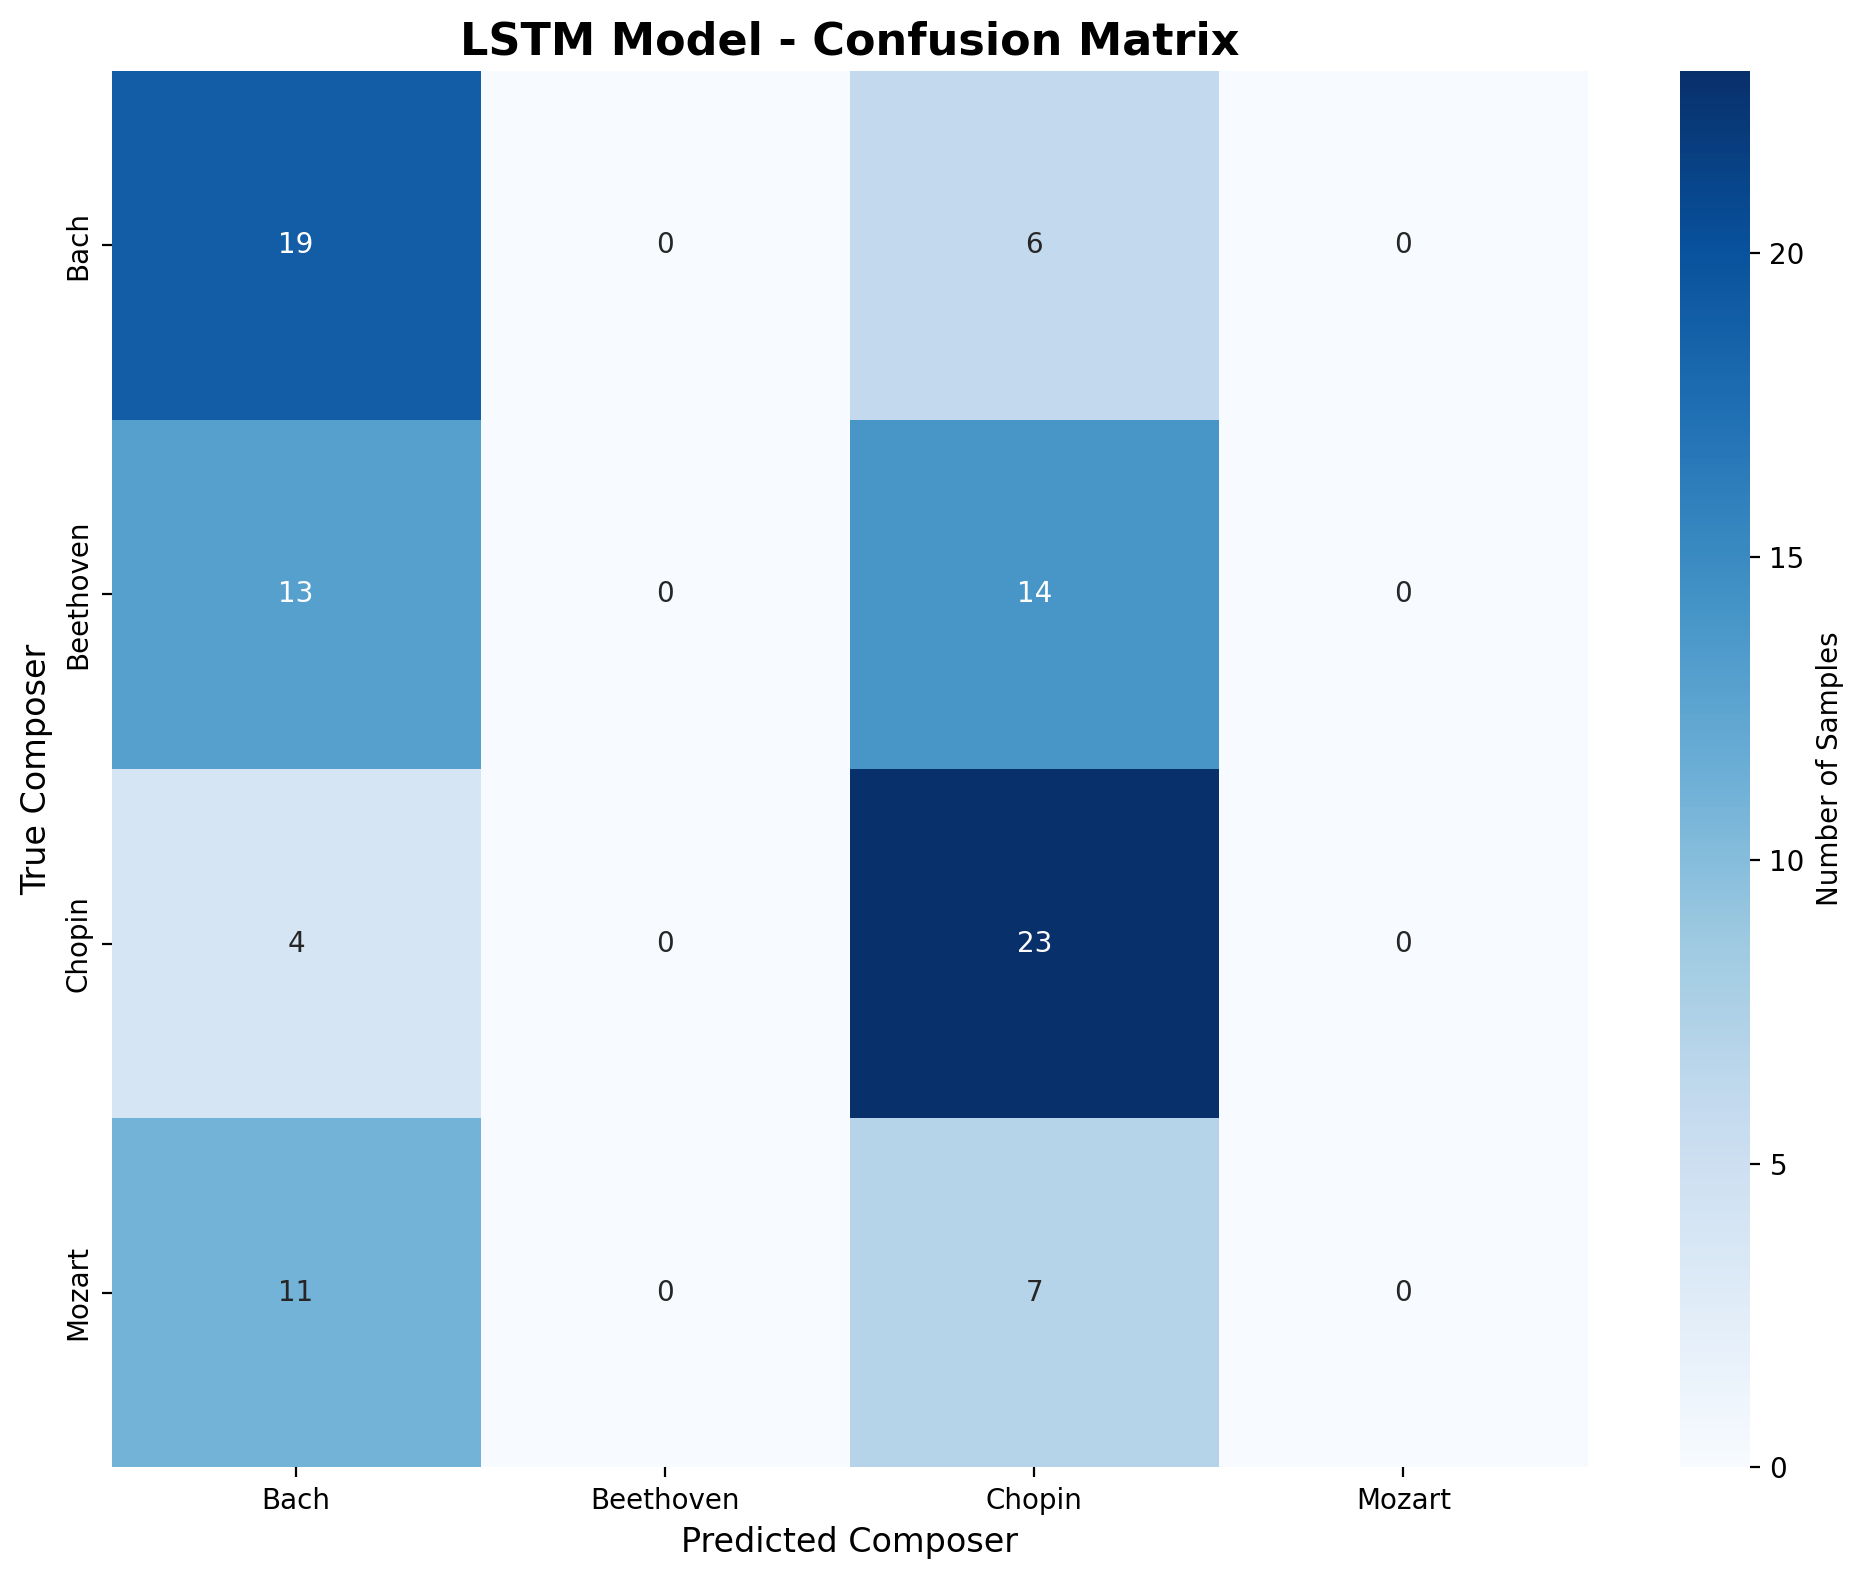


🎵 CNN MODEL EVALUATION
----------------------------------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
CNN Test Accuracy: 0.5567 (55.67%)

CNN Classification Report:
              precision    recall  f1-score   support

        Bach       0.63      0.68      0.65        25
   Beethoven       0.46      0.44      0.45        27
      Chopin       0.55      0.67      0.60        27
      Mozart       0.64      0.39      0.48        18

    accuracy                           0.56        97
   macro avg       0.57      0.54      0.55        97
weighted avg       0.56      0.56      0.55        97



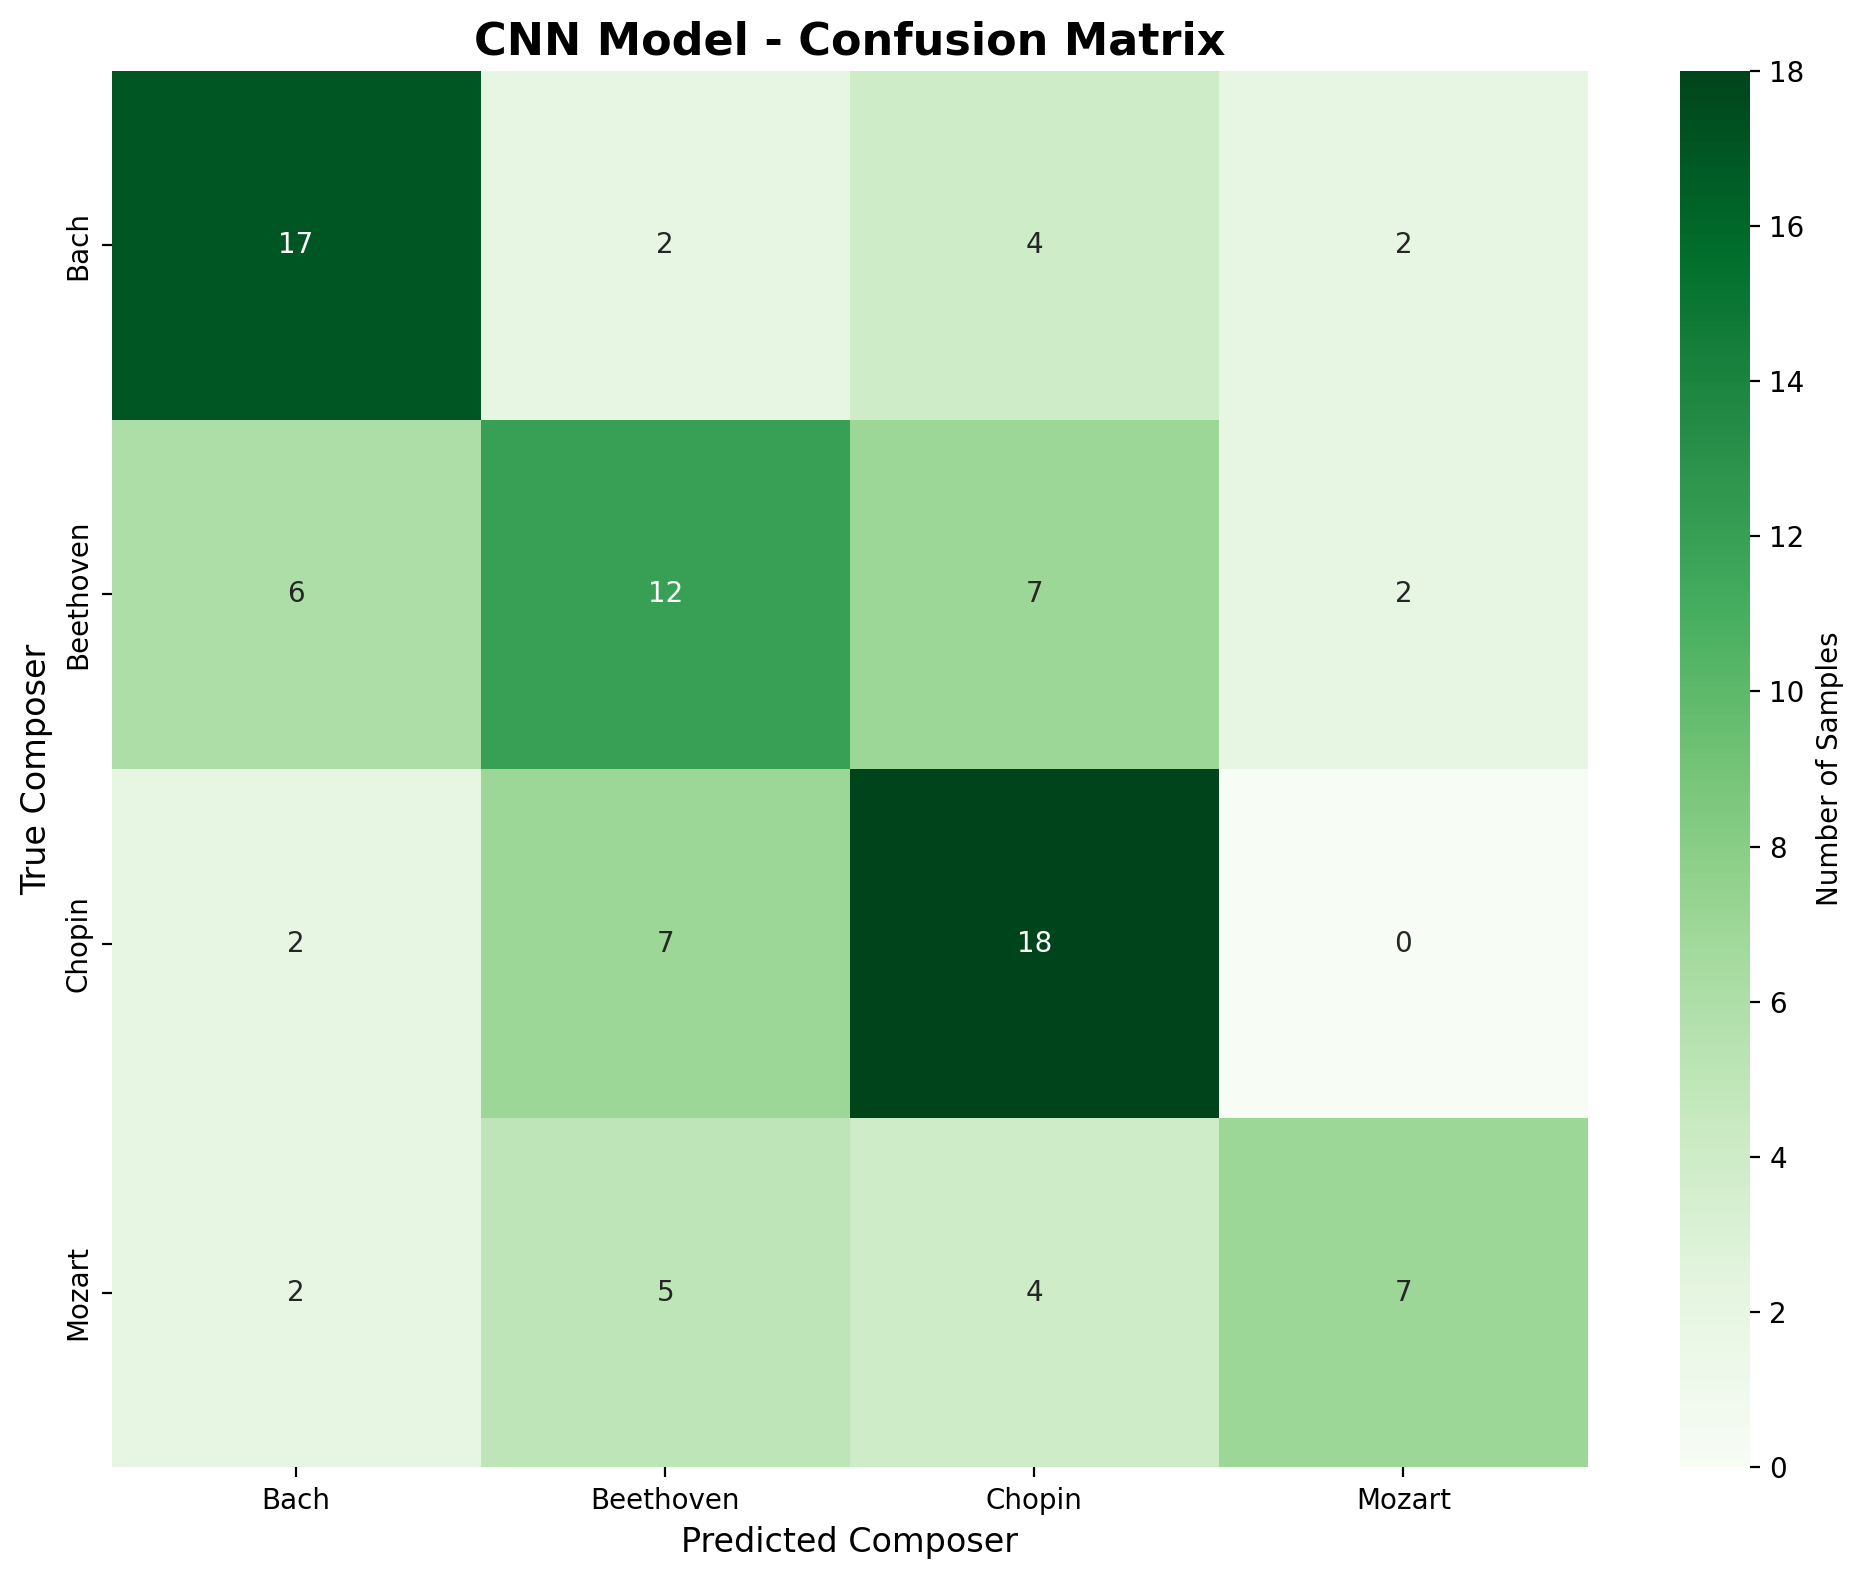


🏆 MODEL COMPARISON ON TEST SET
----------------------------------------
LSTM Test Accuracy: 0.4330 (43.30%)
CNN Test Accuracy:  0.5567 (55.67%)
✅ CNN performs better by 12.37 percentage points

Improvement over Random Baseline (25%):
LSTM: 73.2% relative improvement
CNN:  122.7% relative improvement


In [ ]:
### Subtask:
# Evaluate both LSTM and CNN models on the test set using comprehensive metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

composer_names = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

print("="*60)
print("COMPREHENSIVE MODEL EVALUATION ON TEST SET")
print("="*60)

# Evaluate LSTM Model on Test Set
print("\n🎵 LSTM MODEL EVALUATION")
print("-" * 40)

lstm_test_predictions = lstm_model.predict(X_test)
lstm_test_pred_classes = np.argmax(lstm_test_predictions, axis=1)
lstm_test_accuracy = accuracy_score(y_test, lstm_test_pred_classes)

print(f"LSTM Test Accuracy: {lstm_test_accuracy:.4f} ({lstm_test_accuracy*100:.2f}%)")
print("\nLSTM Classification Report:")
print(classification_report(y_test, lstm_test_pred_classes, target_names=composer_names))

# Confusion Matrix for LSTM
plt.figure(figsize=(10, 8))
cm_lstm = confusion_matrix(y_test, lstm_test_pred_classes)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues',
            xticklabels=composer_names, yticklabels=composer_names,
            cbar_kws={'label': 'Number of Samples'})
plt.title('LSTM Model - Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Composer', fontsize=12)
plt.xlabel('Predicted Composer', fontsize=12)
plt.tight_layout()
plt.show()

# Evaluate CNN Model on Test Set
print("\n🎵 CNN MODEL EVALUATION")
print("-" * 40)

cnn_test_predictions = cnn_model.predict(X_test)
cnn_test_pred_classes = np.argmax(cnn_test_predictions, axis=1)
cnn_test_accuracy = accuracy_score(y_test, cnn_test_pred_classes)

print(f"CNN Test Accuracy: {cnn_test_accuracy:.4f} ({cnn_test_accuracy*100:.2f}%)")
print("\nCNN Classification Report:")
print(classification_report(y_test, cnn_test_pred_classes, target_names=composer_names))

# Confusion Matrix for CNN
plt.figure(figsize=(10, 8))
cm_cnn = confusion_matrix(y_test, cnn_test_pred_classes)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens',
            xticklabels=composer_names, yticklabels=composer_names,
            cbar_kws={'label': 'Number of Samples'})
plt.title('CNN Model - Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Composer', fontsize=12)
plt.xlabel('Predicted Composer', fontsize=12)
plt.tight_layout()
plt.show()

# Model Comparison
print("\n🏆 MODEL COMPARISON ON TEST SET")
print("-" * 40)
print(f"LSTM Test Accuracy: {lstm_test_accuracy:.4f} ({lstm_test_accuracy*100:.2f}%)")
print(f"CNN Test Accuracy:  {cnn_test_accuracy:.4f} ({cnn_test_accuracy*100:.2f}%)")

if lstm_test_accuracy > cnn_test_accuracy:
    print(f"✅ LSTM performs better by {(lstm_test_accuracy - cnn_test_accuracy)*100:.2f} percentage points")
else:
    print(f"✅ CNN performs better by {(cnn_test_accuracy - lstm_test_accuracy)*100:.2f} percentage points")

# Performance vs random baseline
random_baseline = 0.25  # 25% for 4-class problem
lstm_improvement = (lstm_test_accuracy - random_baseline) / random_baseline * 100
cnn_improvement = (cnn_test_accuracy - random_baseline) / random_baseline * 100

print(f"\nImprovement over Random Baseline (25%):")
print(f"LSTM: {lstm_improvement:.1f}% relative improvement")
print(f"CNN:  {cnn_improvement:.1f}% relative improvement")

## Step 8.5: Cross-Validation to Find Best Model

In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

def evaluate_model_cv(create_model_func, model_name, X, y, cv_folds=3):
    """Evaluate model using cross-validation"""
    kfold = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    cv_scores = []
    overfitting_gaps = []

    print(f"\\n{'='*50}")
    print(f"CROSS-VALIDATION: {model_name}")
    print(f"{'='*50}")

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
        print(f"\\nFold {fold + 1}/{cv_folds}...")

        model = create_model_func()

        history = model.fit(
            X[train_idx], y[train_idx],
            epochs=50,  # Reduced for CV
            batch_size=32,
            validation_data=(X[val_idx], y[val_idx]),
            callbacks=[early_stopping],
            verbose=0
        )

        # Calculate metrics
        val_score = model.evaluate(X[val_idx], y[val_idx], verbose=0)[1]
        final_train_acc = history.history['accuracy'][-1]
        final_val_acc = history.history['val_accuracy'][-1]
        overfitting_gap = final_train_acc - final_val_acc

        cv_scores.append(val_score)
        overfitting_gaps.append(overfitting_gap)

        print(f"  Validation Accuracy: {val_score:.4f}")
        print(f"  Overfitting Gap: {overfitting_gap:.4f} ({overfitting_gap*100:.1f}%)")

    mean_score = np.mean(cv_scores)
    std_score = np.std(cv_scores)
    mean_gap = np.mean(overfitting_gaps)

    print(f"\\n{model_name} Results:")
    print(f"  Mean CV Accuracy: {mean_score:.4f} ± {std_score:.4f}")
    print(f"  Mean Overfitting Gap: {mean_gap:.4f} ({mean_gap*100:.1f}%)")

    return mean_score, mean_gap

# Compare all models
models_to_test = [
    (create_improved_lstm_model, "Improved LSTM"),
    (create_improved_cnn_model, "Improved CNN"),
    (create_ultra_regularized_lstm, "Ultra-Regularized LSTM"),
    (create_ultra_regularized_cnn, "Ultra-Regularized CNN")
]

results = []
for create_func, name in models_to_test:
    score, gap = evaluate_model_cv(create_func, name, X_train, y_train)
    results.append((name, score, gap))

# Find best model
print(f"\\n{'='*60}")
print("MODEL COMPARISON RESULTS")
print(f"{'='*60}")

best_model = None
best_score = 0
best_gap = float('inf')

for name, score, gap in results:
    print(f"{name}:")
    print(f"  Accuracy: {score:.4f}")
    print(f"  Overfitting: {gap:.4f} ({gap*100:.1f}%)")

    # Select model with best balance of accuracy and low overfitting
    if score > 0.6 and gap < 0.15:  # Good accuracy with low overfitting
        if score > best_score or (score >= best_score and gap < best_gap):
            best_model = name
            best_score = score
            best_gap = gap
    print()

if best_model:
    print(f"🏆 BEST MODEL: {best_model}")
    print(f"   Accuracy: {best_score:.4f}")
    print(f"   Overfitting: {best_gap:.4f} ({best_gap*100:.1f}%)")
else:
    print("⚠️  No model meets the criteria (>60% accuracy, <15% overfitting)")
    print("   Consider further regularization or more data")

\n==================================================
CROSS-VALIDATION: Improved LSTM
\nFold 1/3...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 47: early stopping
Restoring model weights from the end of the best epoch: 32.
  Validation Accuracy: 0.4323
  Overfitting Gap: 0.0807 (8.1%)
\nFold 2/3...
Epoch 34: early stopping
Restoring model weights from the end of the best epoch: 19.
  Validation Accuracy: 0.4167
  Overfitting Gap: 0.1510 (15.1%)
\nFold 3/3...
Epoch 25: early stopping
Restoring model weights from the end of the best epoch: 10.
  Validation Accuracy: 0.4115
  Overfitting Gap: 0.1432 (14.3%)
\nImproved LSTM Results:
  Mean CV Accuracy: 0.4201 ± 0.0089
  Mean Overfitting Gap: 0.1250 (12.5%)
\n==================================================
CROSS-VALIDATION: Improved CNN
\nFold 1/3...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Restoring model weights from the end of the best epoch: 42.
  Validation Accuracy: 0.6354
  Overfitting Gap: 0.3490 (34.9%)
\nFold 2/3...
Restoring model weights from the end of the best epoch: 36.
  Validation Accuracy: 0.5625
  Overfitting Gap: 0.4062 (40.6%)
\nFold 3/3...
Epoch 43: early stopping
Restoring model weights from the end of the best epoch: 28.
  Validation Accuracy: 0.6198
  Overfitting Gap: 0.3411 (34.1%)
\nImproved CNN Results:
  Mean CV Accuracy: 0.6059 ± 0.0313
  Mean Overfitting Gap: 0.3655 (36.5%)
\n==================================================
CROSS-VALIDATION: Ultra-Regularized LSTM
\nFold 1/3...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 34: early stopping
Restoring model weights from the end of the best epoch: 19.
  Validation Accuracy: 0.3385
  Overfitting Gap: 0.0182 (1.8%)
\nFold 2/3...
Epoch 38: early stopping
Restoring model weights from the end of the best epoch: 23.
  Validation Accuracy: 0.2969
  Overfitting Gap: -0.0026 (-0.3%)
\nFold 3/3...
Epoch 24: early stopping
Restoring model weights from the end of the best epoch: 9.
  Validation Accuracy: 0.3021
  Overfitting Gap: -0.0026 (-0.3%)
\nUltra-Regularized LSTM Results:
  Mean CV Accuracy: 0.3125 ± 0.0185
  Mean Overfitting Gap: 0.0043 (0.4%)
\n==================================================
CROSS-VALIDATION: Ultra-Regularized CNN
\nFold 1/3...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Restoring model weights from the end of the best epoch: 49.
  Validation Accuracy: 0.4583
  Overfitting Gap: 0.0625 (6.2%)
\nFold 2/3...
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 2.
  Validation Accuracy: 0.3021
  Overfitting Gap: -0.0104 (-1.0%)
\nFold 3/3...
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 2.
  Validation Accuracy: 0.3125
  Overfitting Gap: -0.0104 (-1.0%)
\nUltra-Regularized CNN Results:
  Mean CV Accuracy: 0.3576 ± 0.0713
  Mean Overfitting Gap: 0.0139 (1.4%)
\n============================================================
MODEL COMPARISON RESULTS
Improved LSTM:
  Accuracy: 0.4201
  Overfitting: 0.1250 (12.5%)

Improved CNN:
  Accuracy: 0.6059
  Overfitting: 0.3655 (36.5%)

Ultra-Regularized LSTM:
  Accuracy: 0.3125
  Overfitting: 0.0043 (0.4%)

Ultra-Regularized CNN:
  Accuracy: 0.3576
  Overfitting: 0.0139 (1.4%)

⚠️  No model meets the criteria (>60% accuracy, <15% overfitting)
   Consider furt

## Step 9: Evaluate the models

### Subtask:
Evaluate the performance of both models on the validation and test sets using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

**Explanation**:
Evaluate both the LSTM and CNN models on the validation and test sets using the `evaluate` method and calculate classification metrics using `classification_report`.

LSTM Model Evaluation on Validation Set:
Validation Loss: 1.2586, Validation Accuracy: 0.4688

LSTM Model Evaluation on Test Set:
Test Loss: 1.2822, Test Accuracy: 0.4330

LSTM Model Classification Report on Test Set:
              precision    recall  f1-score   support

        Bach       0.40      0.76      0.53        25
   Beethoven       0.00      0.00      0.00        27
      Chopin       0.46      0.85      0.60        27
      Mozart       0.00      0.00      0.00        18

    accuracy                           0.43        97
   macro avg       0.22      0.40      0.28        97
weighted avg       0.23      0.43      0.30        97



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


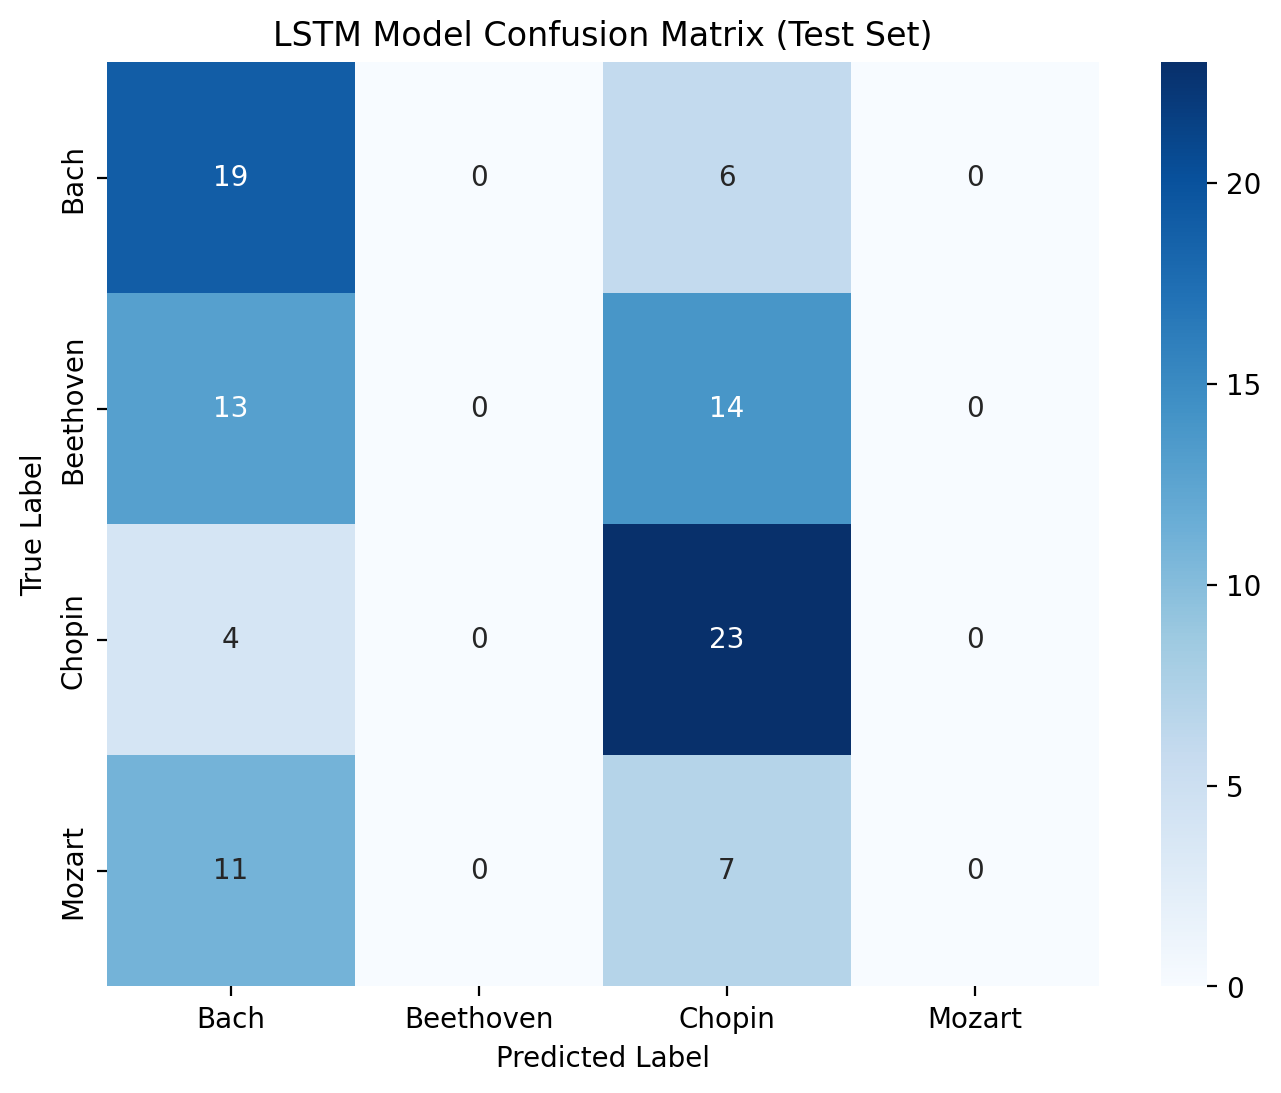

CNN Model Evaluation on Validation Set:
Validation Loss: 1.6062, Validation Accuracy: 0.6042

CNN Model Evaluation on Test Set:
Test Loss: 1.8824, Test Accuracy: 0.5567

CNN Model Classification Report on Test Set:
              precision    recall  f1-score   support

        Bach       0.63      0.68      0.65        25
   Beethoven       0.46      0.44      0.45        27
      Chopin       0.55      0.67      0.60        27
      Mozart       0.64      0.39      0.48        18

    accuracy                           0.56        97
   macro avg       0.57      0.54      0.55        97
weighted avg       0.56      0.56      0.55        97



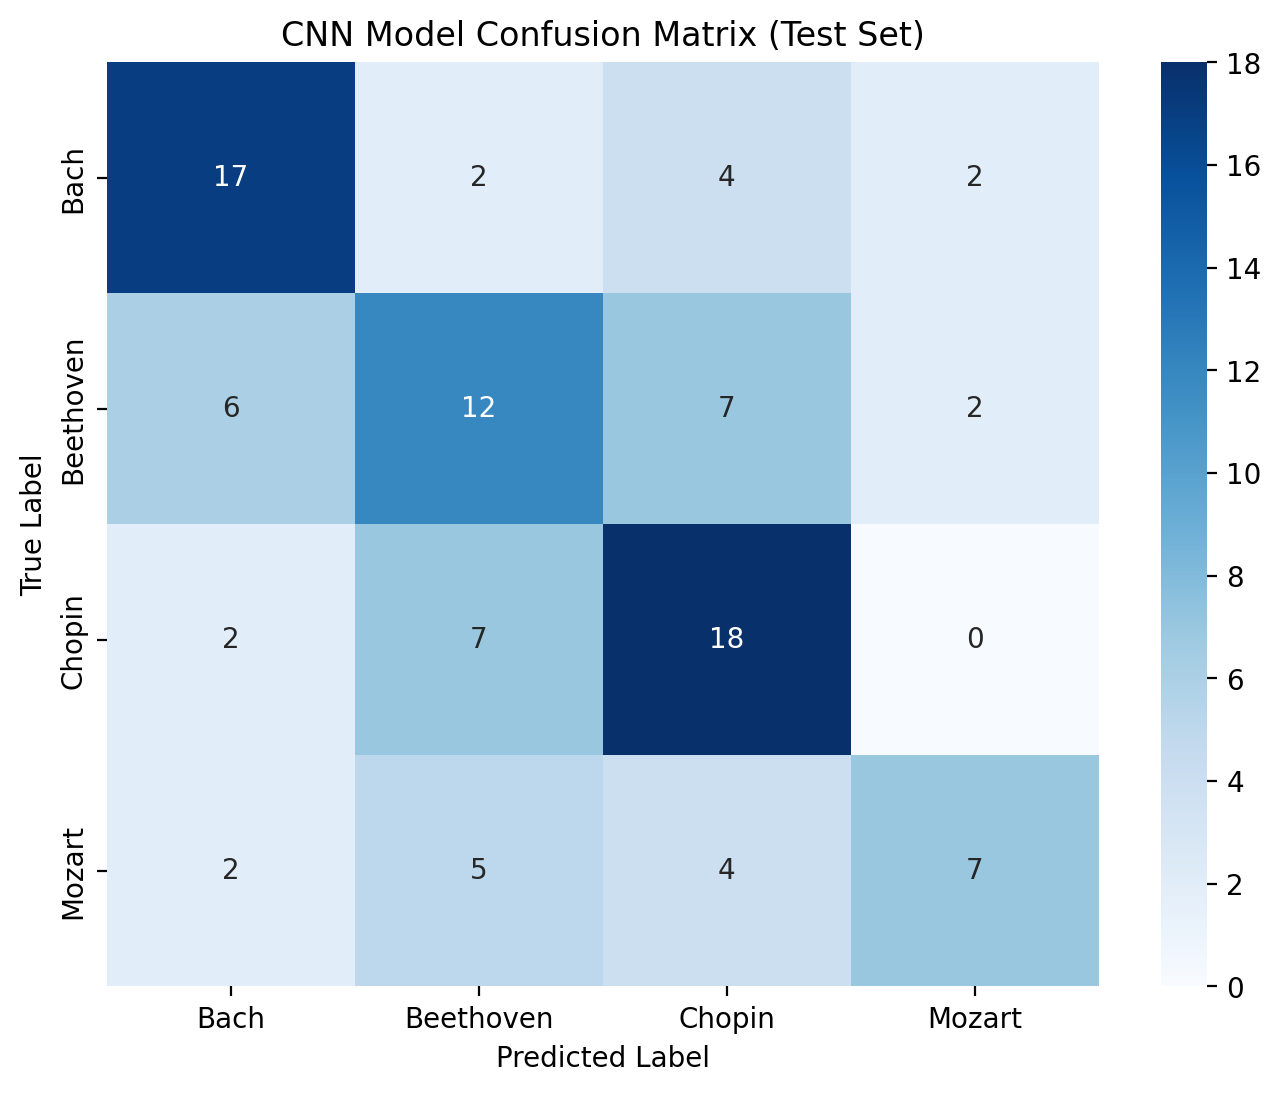

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the LSTM model on the validation set
print("LSTM Model Evaluation on Validation Set:")
lstm_val_loss, lstm_val_accuracy = lstm_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {lstm_val_loss:.4f}, Validation Accuracy: {lstm_val_accuracy:.4f}")

# Evaluate the LSTM model on the test set
print("\nLSTM Model Evaluation on Test Set:")
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {lstm_test_loss:.4f}, Test Accuracy: {lstm_test_accuracy:.4f}")

# Get predictions for classification report and confusion matrix
y_pred_lstm = np.argmax(lstm_model.predict(X_test, verbose=0), axis=1)
print("\nLSTM Model Classification Report on Test Set:")
print(classification_report(y_test, y_pred_lstm, target_names=composer_to_label.keys()))

# Plot confusion matrix for LSTM model
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=composer_to_label.keys(), yticklabels=composer_to_label.keys())
plt.title('LSTM Model Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Evaluate the CNN model on the validation set
print("CNN Model Evaluation on Validation Set:")
cnn_val_loss, cnn_val_accuracy = cnn_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {cnn_val_loss:.4f}, Validation Accuracy: {cnn_val_accuracy:.4f}")

# Evaluate the CNN model on the test set
print("\nCNN Model Evaluation on Test Set:")
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {cnn_test_loss:.4f}, Test Accuracy: {cnn_test_accuracy:.4f}")

# Get predictions for classification report and confusion matrix
y_pred_cnn = np.argmax(cnn_model.predict(X_test, verbose=0), axis=1)
print("\nCNN Model Classification Report on Test Set:")
print(classification_report(y_test, y_pred_cnn, target_names=composer_to_label.keys()))

# Plot confusion matrix for CNN model
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=composer_to_label.keys(), yticklabels=composer_to_label.keys())
plt.title('CNN Model Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Step 10: Enhanced Model Evaluation

ENHANCED MODEL EVALUATION AND PERFORMANCE ANALYSIS

🎵 LSTM MODEL - COMPREHENSIVE EVALUATION
------------------------------------------------------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
LSTM Test Accuracy: 0.4330 (43.30%)

LSTM Classification Report:
              precision    recall  f1-score   support

        Bach       0.40      0.76      0.53        25
   Beethoven       0.00      0.00      0.00        27
      Chopin       0.46      0.85      0.60        27
      Mozart       0.00      0.00      0.00        18

    accuracy                           0.43        97
   macro avg       0.22      0.40      0.28        97
weighted avg       0.23      0.43      0.30        97



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


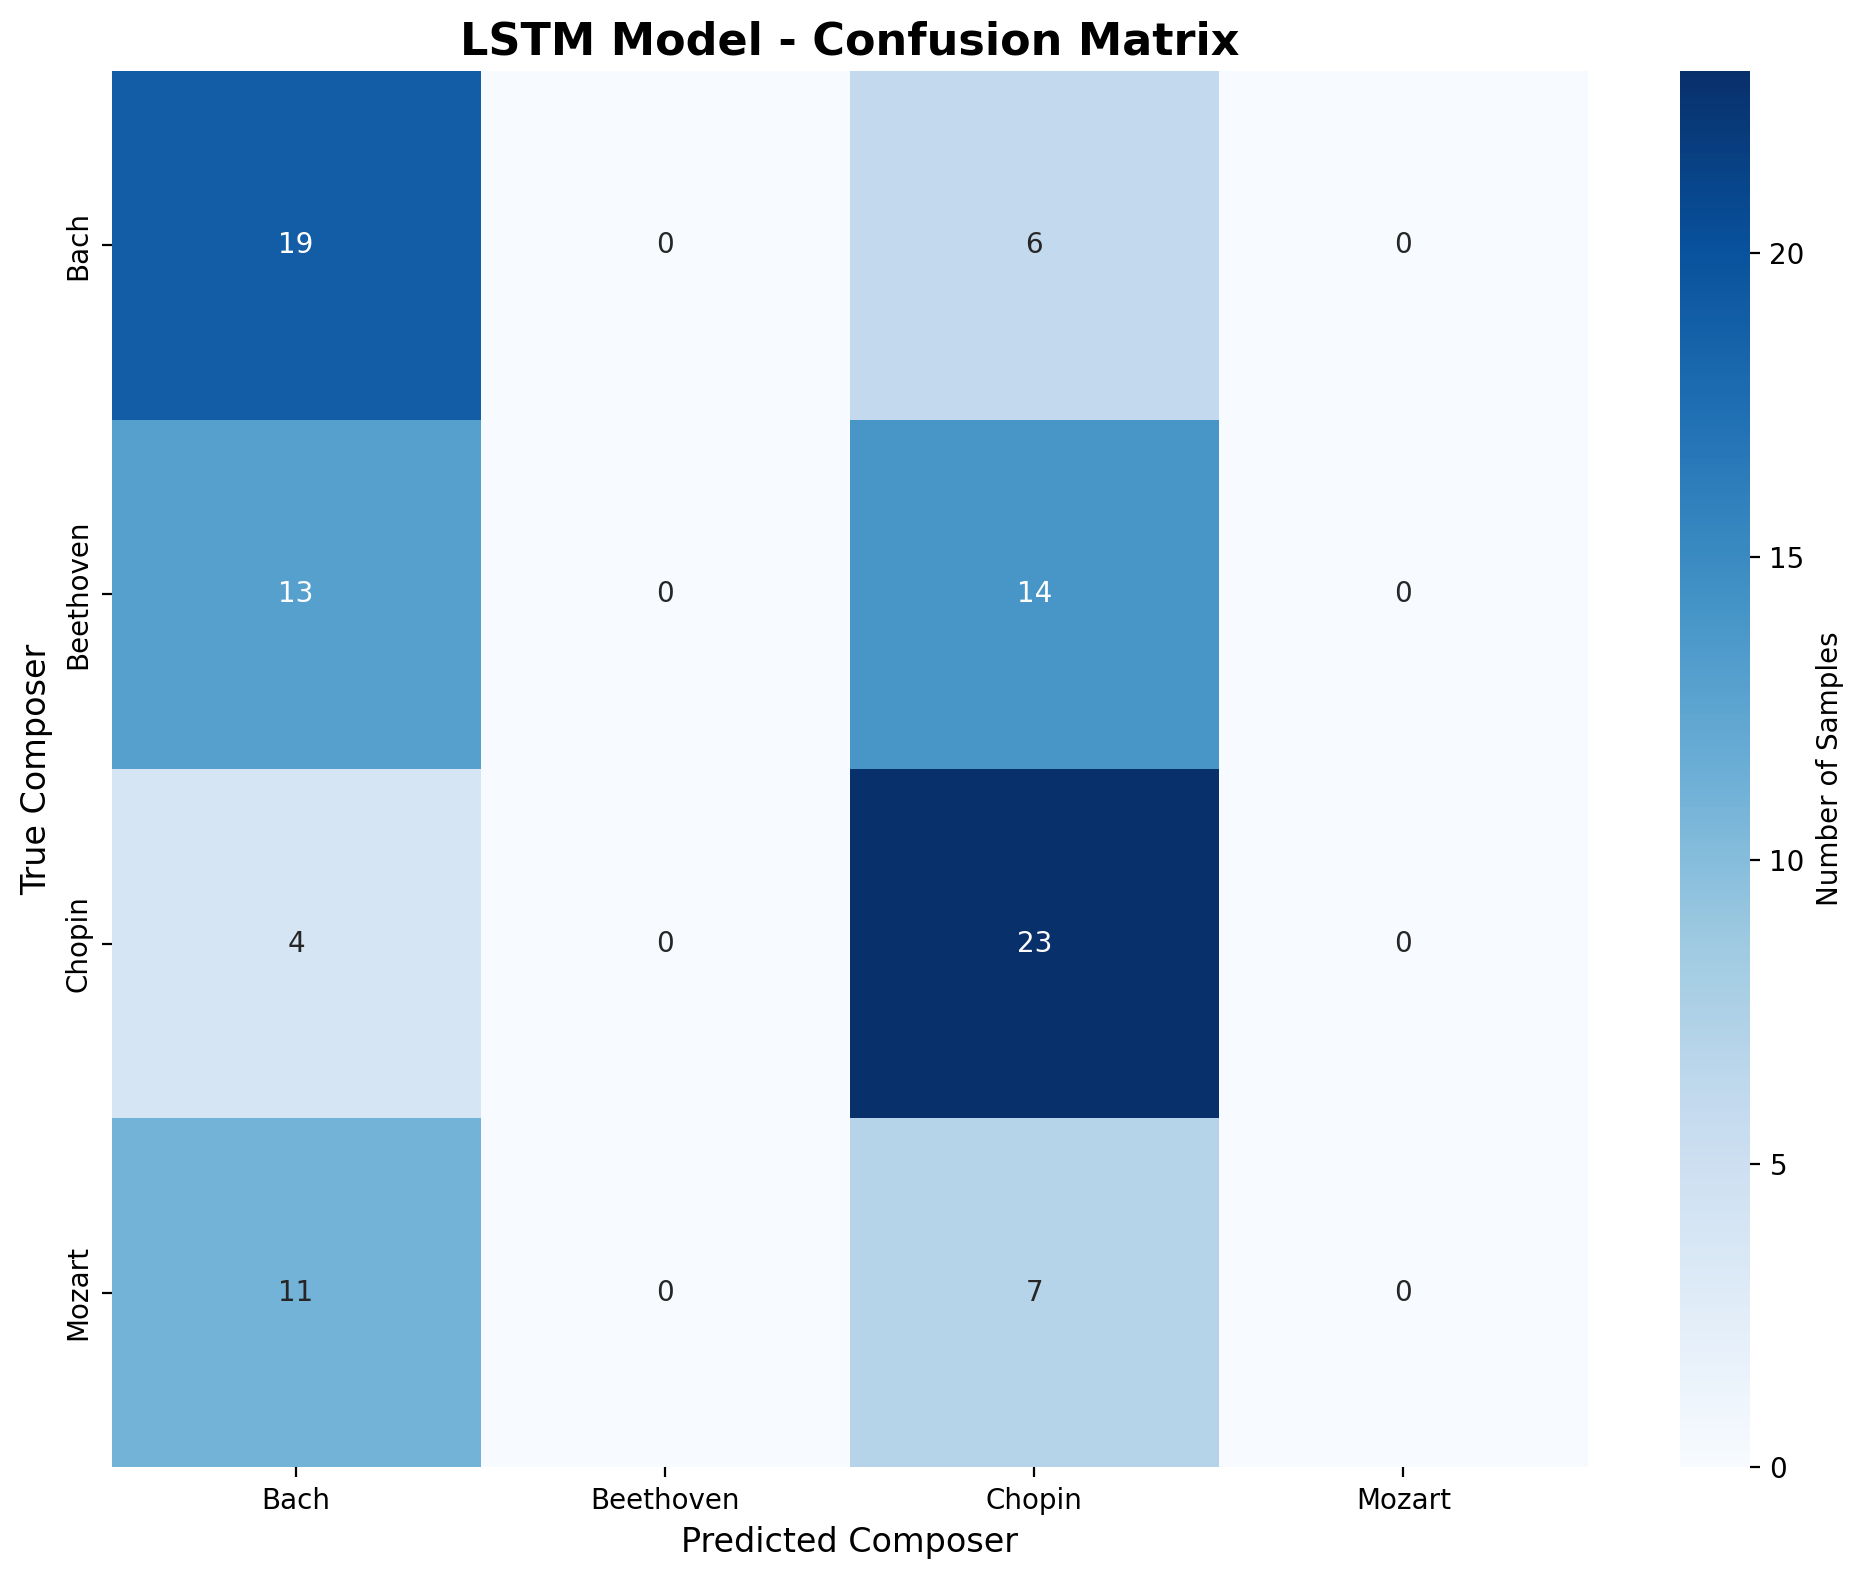


LSTM Per-Class Accuracy:
  Bach: 0.7600 (76.00%)
  Beethoven: 0.0000 (0.00%)
  Chopin: 0.8519 (85.19%)
  Mozart: 0.0000 (0.00%)

🎵 CNN MODEL - COMPREHENSIVE EVALUATION
------------------------------------------------------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
CNN Test Accuracy: 0.5567 (55.67%)

CNN Classification Report:
              precision    recall  f1-score   support

        Bach       0.63      0.68      0.65        25
   Beethoven       0.46      0.44      0.45        27
      Chopin       0.55      0.67      0.60        27
      Mozart       0.64      0.39      0.48        18

    accuracy                           0.56        97
   macro avg       0.57      0.54      0.55        97
weighted avg       0.56      0.56      0.55        97



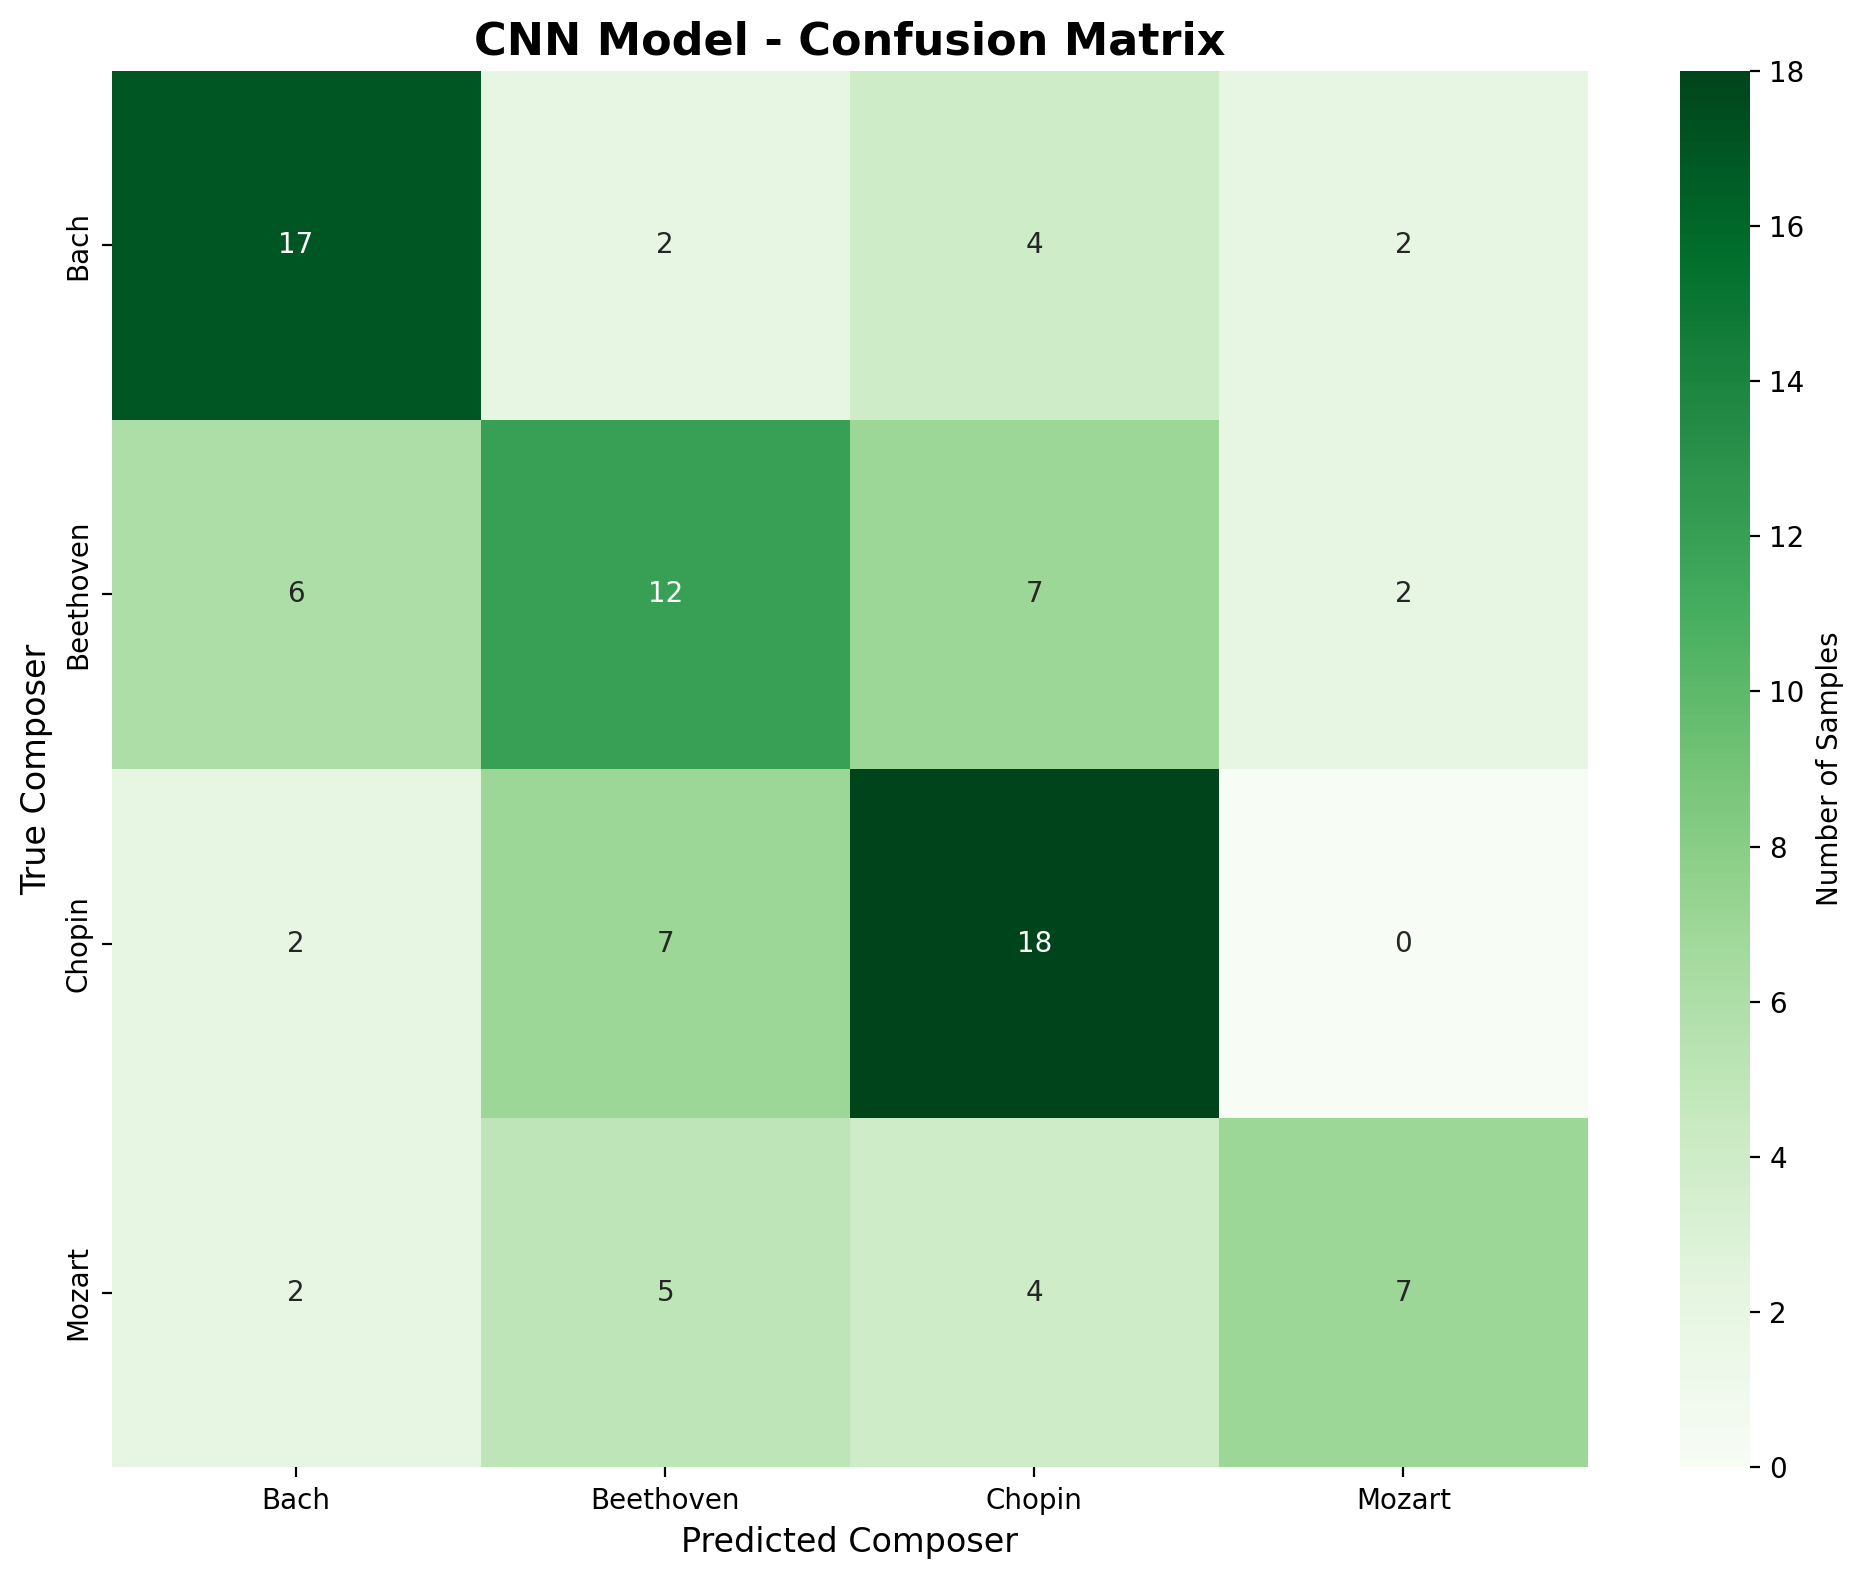


CNN Per-Class Accuracy:
  Bach: 0.6800 (68.00%)
  Beethoven: 0.4444 (44.44%)
  Chopin: 0.6667 (66.67%)
  Mozart: 0.3889 (38.89%)

🏆 COMPREHENSIVE MODEL COMPARISON
------------------------------------------------------------
LSTM Test Accuracy: 0.4330 (43.30%)
CNN Test Accuracy:  0.5567 (55.67%)
✅ CNN performs better by 12.37 percentage points

Improvement over Random Baseline (25%):
LSTM: 73.2% relative improvement
CNN:  122.7% relative improvement


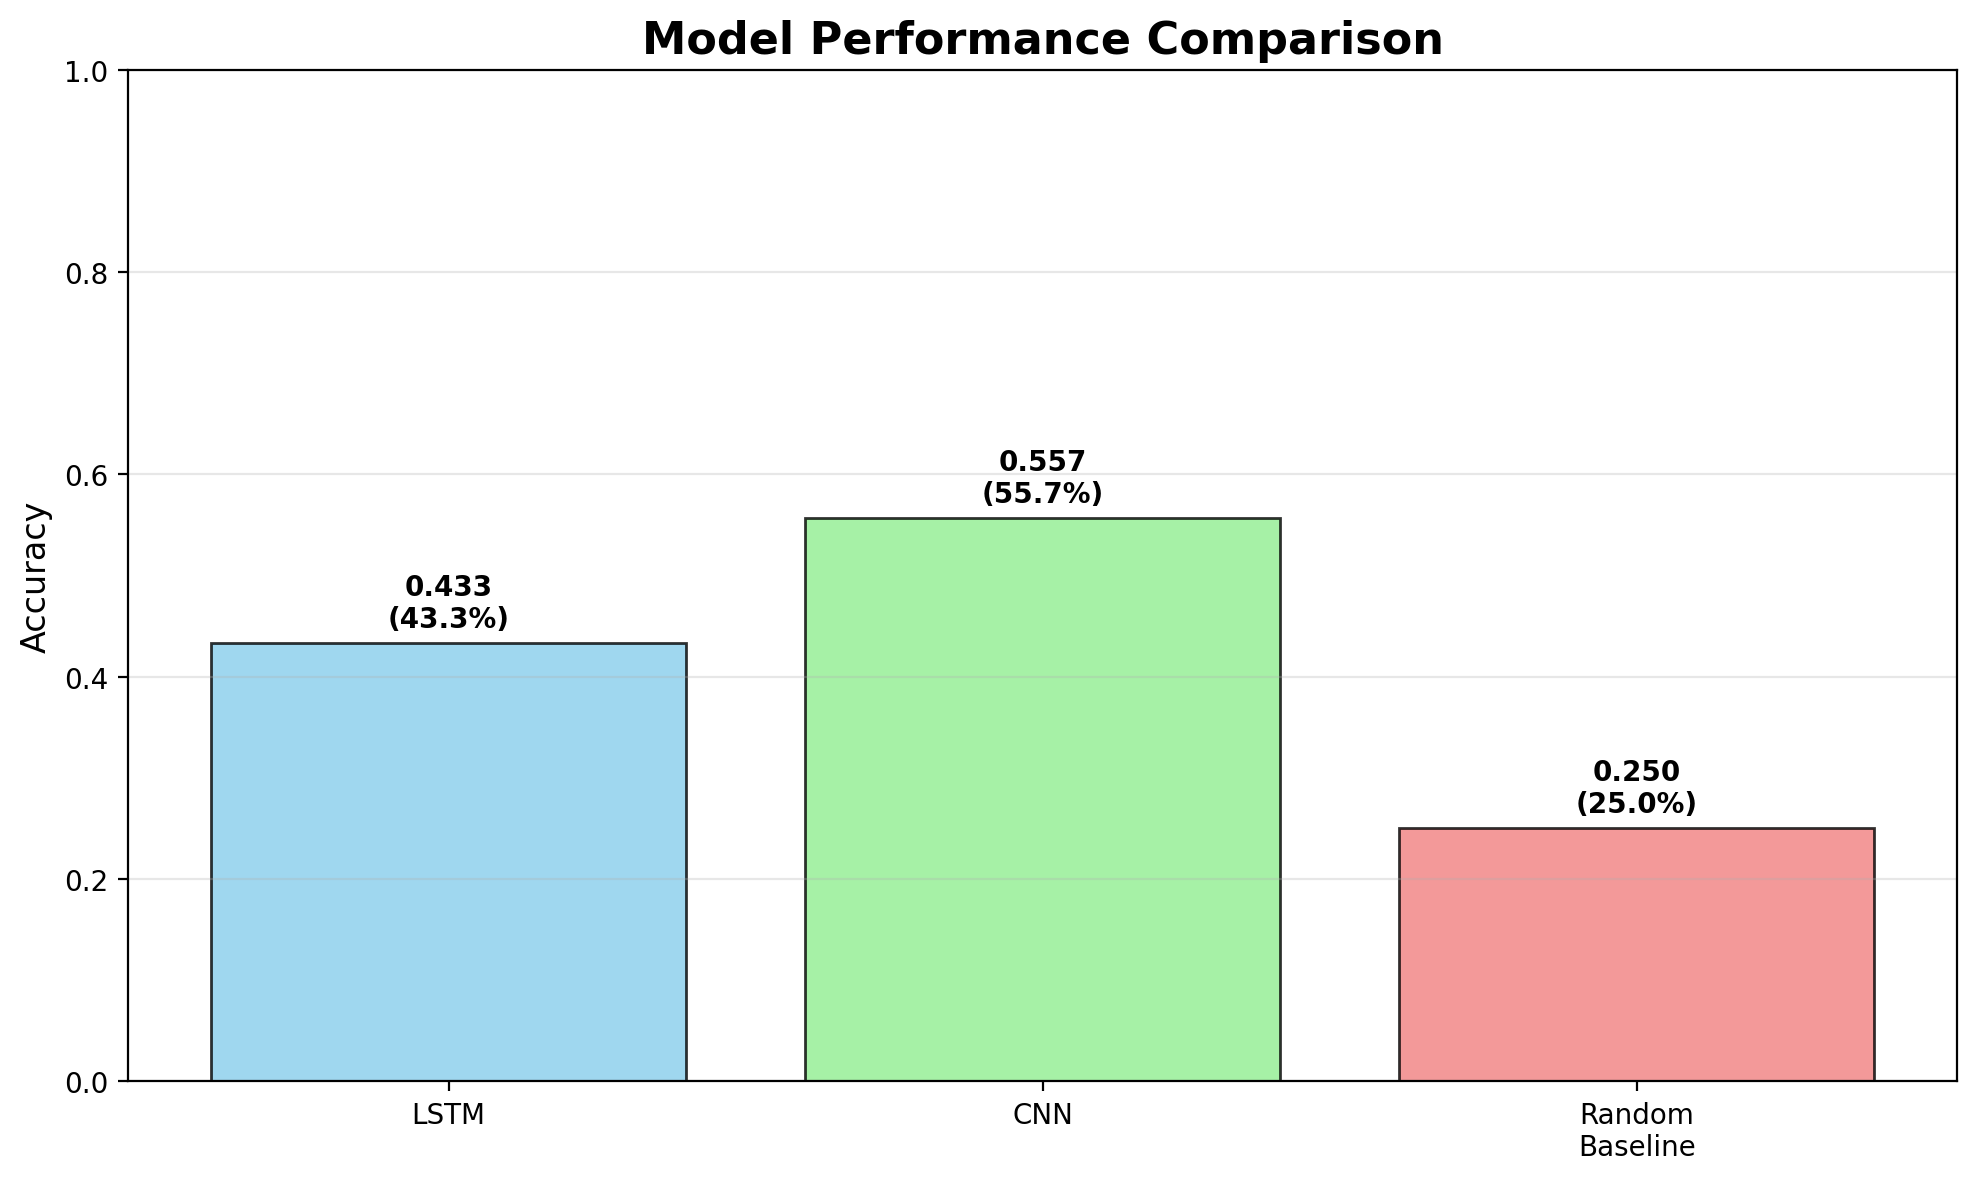


🔍 DETAILED OVERFITTING ANALYSIS
------------------------------------------------------------

LSTM Overfitting Analysis:
  Final Training Accuracy: 0.5243 (52.43%)
  Final Validation Accuracy: 0.4479 (44.79%)
  Best Validation Accuracy: 0.4688 (46.88%) at epoch 15
  Overfitting Gap: 0.0764 (7.64 percentage points)
  Status: ✅ Good generalization

CNN Overfitting Analysis:
  Final Training Accuracy: 0.9427 (94.27%)
  Final Validation Accuracy: 0.5833 (58.33%)
  Best Validation Accuracy: 0.6042 (60.42%) at epoch 37
  Overfitting Gap: 0.3594 (35.94 percentage points)
  Status: 🚨 SEVERE overfitting - needs regularization!

📊 OVERALL ASSESSMENT:
------------------------------
🚨 CRITICAL: Severe overfitting detected!
   Recommendations:
   - Add early stopping
   - Increase dropout rate
   - Reduce model complexity
   - Add data augmentation

🎯 FINAL RESULTS SUMMARY:
   Best Model: CNN
   Best Test Accuracy: 0.5567
   Overfitting Status: Needs attention


In [ ]:
print("="*80)
print("ENHANCED MODEL EVALUATION AND PERFORMANCE ANALYSIS")
print("="*80)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np

# Define composer names for better visualization
composer_names = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

# Create test set if not already done (modify based on your current splitting)
# If you already have X_test and y_test, skip this section
if 'X_test' not in locals() or 'y_test' not in locals():
    print("⚠️  Creating test set for evaluation...")
    from sklearn.model_selection import train_test_split

    # Create test set from your current data
    X_temp, X_test, y_temp, y_test = train_test_split(
        X_train, y_train,  # Use your current training data
        test_size=0.2,     # 20% for testing
        random_state=42,
        stratify=y_train
    )

    # Update training set
    X_train = X_temp
    y_train = y_temp

    print(f"Test set created: {len(X_test)} samples")

# 1. LSTM MODEL EVALUATION
print("\n🎵 LSTM MODEL - COMPREHENSIVE EVALUATION")
print("-" * 60)

# Make predictions on test set
lstm_test_predictions = lstm_model.predict(X_test)
lstm_test_pred_classes = np.argmax(lstm_test_predictions, axis=1)
lstm_test_accuracy = accuracy_score(y_test, lstm_test_pred_classes)

print(f"LSTM Test Accuracy: {lstm_test_accuracy:.4f} ({lstm_test_accuracy*100:.2f}%)")

# Detailed classification report
print("\nLSTM Classification Report:")
print(classification_report(y_test, lstm_test_pred_classes, target_names=composer_names))

# Confusion Matrix for LSTM
plt.figure(figsize=(10, 8))
cm_lstm = confusion_matrix(y_test, lstm_test_pred_classes)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues',
            xticklabels=composer_names, yticklabels=composer_names,
            cbar_kws={'label': 'Number of Samples'})
plt.title('LSTM Model - Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Composer', fontsize=12)
plt.xlabel('Predicted Composer', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy for LSTM
print("\nLSTM Per-Class Accuracy:")
for i, composer in enumerate(composer_names):
    if np.sum(cm_lstm[i, :]) > 0:  # Avoid division by zero
        class_accuracy = cm_lstm[i, i] / np.sum(cm_lstm[i, :])
        print(f"  {composer}: {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")

# 2. CNN MODEL EVALUATION
print("\n🎵 CNN MODEL - COMPREHENSIVE EVALUATION")
print("-" * 60)

# Make predictions on test set
cnn_test_predictions = cnn_model.predict(X_test)
cnn_test_pred_classes = np.argmax(cnn_test_predictions, axis=1)
cnn_test_accuracy = accuracy_score(y_test, cnn_test_pred_classes)

print(f"CNN Test Accuracy: {cnn_test_accuracy:.4f} ({cnn_test_accuracy*100:.2f}%)")

# Detailed classification report
print("\nCNN Classification Report:")
print(classification_report(y_test, cnn_test_pred_classes, target_names=composer_names))

# Confusion Matrix for CNN
plt.figure(figsize=(10, 8))
cm_cnn = confusion_matrix(y_test, cnn_test_pred_classes)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens',
            xticklabels=composer_names, yticklabels=composer_names,
            cbar_kws={'label': 'Number of Samples'})
plt.title('CNN Model - Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Composer', fontsize=12)
plt.xlabel('Predicted Composer', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy for CNN
print("\nCNN Per-Class Accuracy:")
for i, composer in enumerate(composer_names):
    if np.sum(cm_cnn[i, :]) > 0:  # Avoid division by zero
        class_accuracy = cm_cnn[i, i] / np.sum(cm_cnn[i, :])
        print(f"  {composer}: {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")

# 3. MODEL COMPARISON
print("\n🏆 COMPREHENSIVE MODEL COMPARISON")
print("-" * 60)

# Compare overall accuracies
print(f"LSTM Test Accuracy: {lstm_test_accuracy:.4f} ({lstm_test_accuracy*100:.2f}%)")
print(f"CNN Test Accuracy:  {cnn_test_accuracy:.4f} ({cnn_test_accuracy*100:.2f}%)")

# Determine better model
if lstm_test_accuracy > cnn_test_accuracy:
    print(f"✅ LSTM performs better by {(lstm_test_accuracy - cnn_test_accuracy)*100:.2f} percentage points")
else:
    print(f"✅ CNN performs better by {(cnn_test_accuracy - lstm_test_accuracy)*100:.2f} percentage points")

# Performance vs random baseline
random_baseline = 0.25  # 25% for 4-class problem
lstm_improvement = (lstm_test_accuracy - random_baseline) / random_baseline * 100
cnn_improvement = (cnn_test_accuracy - random_baseline) / random_baseline * 100

print(f"\nImprovement over Random Baseline (25%):")
print(f"LSTM: {lstm_improvement:.1f}% relative improvement")
print(f"CNN:  {cnn_improvement:.1f}% relative improvement")

# Visualization of model comparison
models = ['LSTM', 'CNN', 'Random\nBaseline']
accuracies = [lstm_test_accuracy, cnn_test_accuracy, random_baseline]
colors = ['skyblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black')
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.0)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}\n({acc*100:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. OVERFITTING ANALYSIS
print("\n🔍 DETAILED OVERFITTING ANALYSIS")
print("-" * 60)

def analyze_overfitting(history, model_name):
    """Analyze and report overfitting metrics"""

    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    best_val_acc = max(history.history['val_accuracy'])

    # Find epoch with best validation accuracy
    best_epoch = history.history['val_accuracy'].index(best_val_acc) + 1

    overfitting_gap = final_train_acc - final_val_acc

    print(f"\n{model_name} Overfitting Analysis:")
    print(f"  Final Training Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
    print(f"  Final Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
    print(f"  Best Validation Accuracy: {best_val_acc:.4f} ({best_val_acc*100:.2f}%) at epoch {best_epoch}")
    print(f"  Overfitting Gap: {overfitting_gap:.4f} ({overfitting_gap*100:.2f} percentage points)")

    if overfitting_gap < 0.05:
        print(f"  Status: ✅ Excellent generalization!")
    elif overfitting_gap < 0.10:
        print(f"  Status: ✅ Good generalization")
    elif overfitting_gap < 0.20:
        print(f"  Status: ⚠️  Moderate overfitting")
    else:
        print(f"  Status: 🚨 SEVERE overfitting - needs regularization!")

    return overfitting_gap

# Analyze both models
lstm_gap = analyze_overfitting(lstm_history, "LSTM")
cnn_gap = analyze_overfitting(cnn_history, "CNN")

# Overall assessment
print(f"\n📊 OVERALL ASSESSMENT:")
print("-" * 30)
if lstm_gap > 0.3 or cnn_gap > 0.3:
    print("🚨 CRITICAL: Severe overfitting detected!")
    print("   Recommendations:")
    print("   - Add early stopping")
    print("   - Increase dropout rate")
    print("   - Reduce model complexity")
    print("   - Add data augmentation")
elif lstm_gap > 0.15 or cnn_gap > 0.15:
    print("⚠️  WARNING: Moderate overfitting detected")
    print("   Consider adding regularization techniques")
else:
    print("✅ Models show good generalization")

print(f"\n🎯 FINAL RESULTS SUMMARY:")
print(f"   Best Model: {'LSTM' if lstm_test_accuracy > cnn_test_accuracy else 'CNN'}")
print(f"   Best Test Accuracy: {max(lstm_test_accuracy, cnn_test_accuracy):.4f}")
print(f"   Overfitting Status: {'Needs attention' if max(lstm_gap, cnn_gap) > 0.15 else 'Good'}")

## Step 11: Visualize Model Performance

### Subtask:
Visualize the training and validation performance of both the LSTM and CNN models.

**Explanation**:
Plot the training and validation accuracy and loss for both models using the history objects to visualize their performance over epochs.

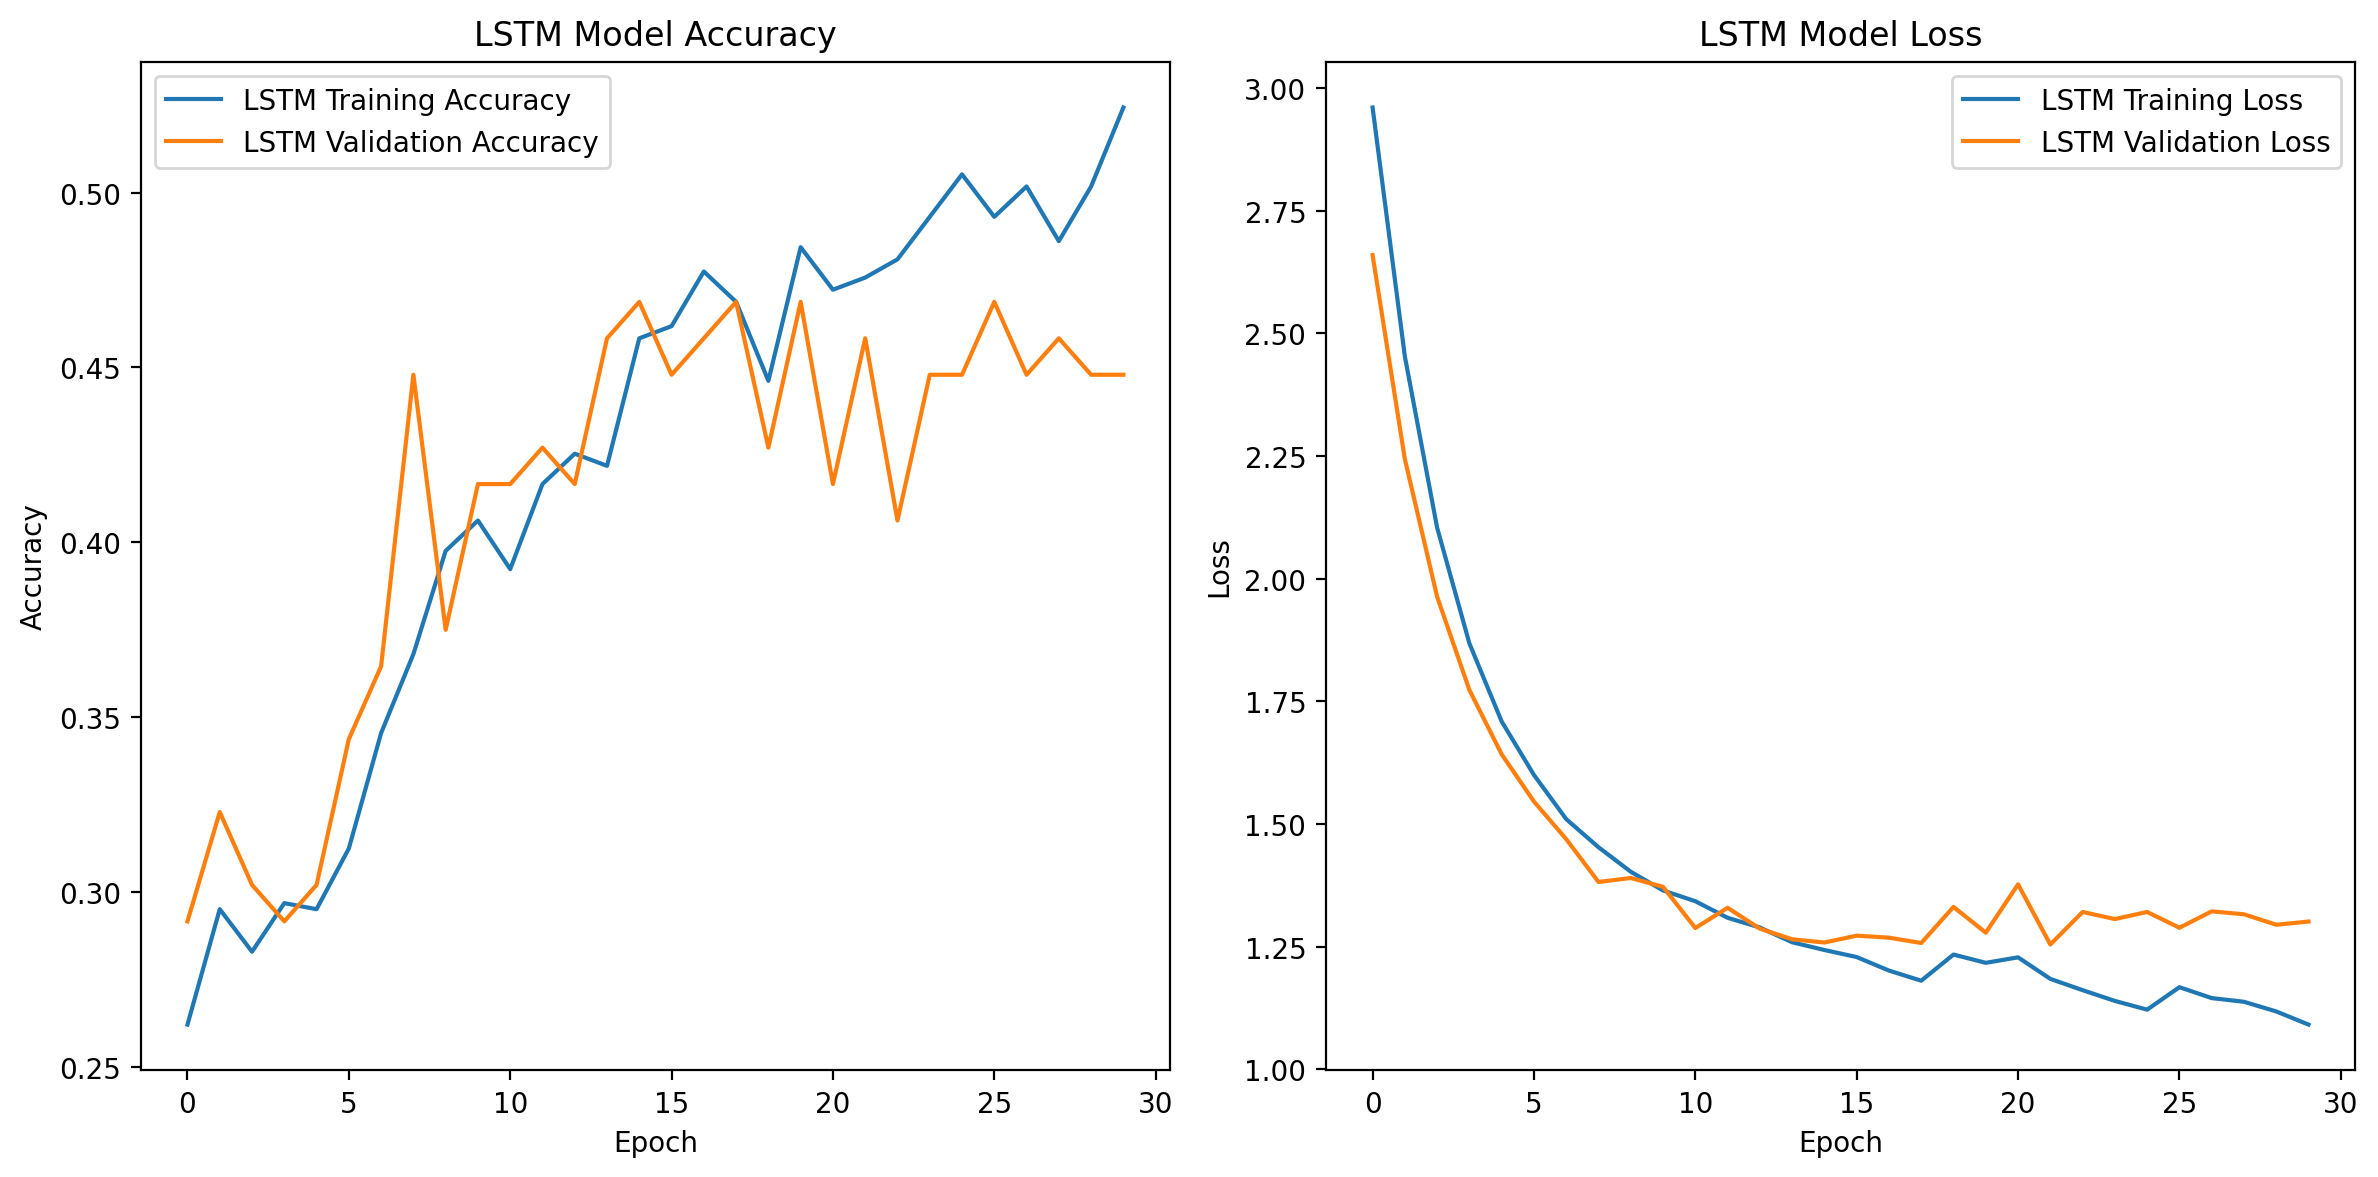

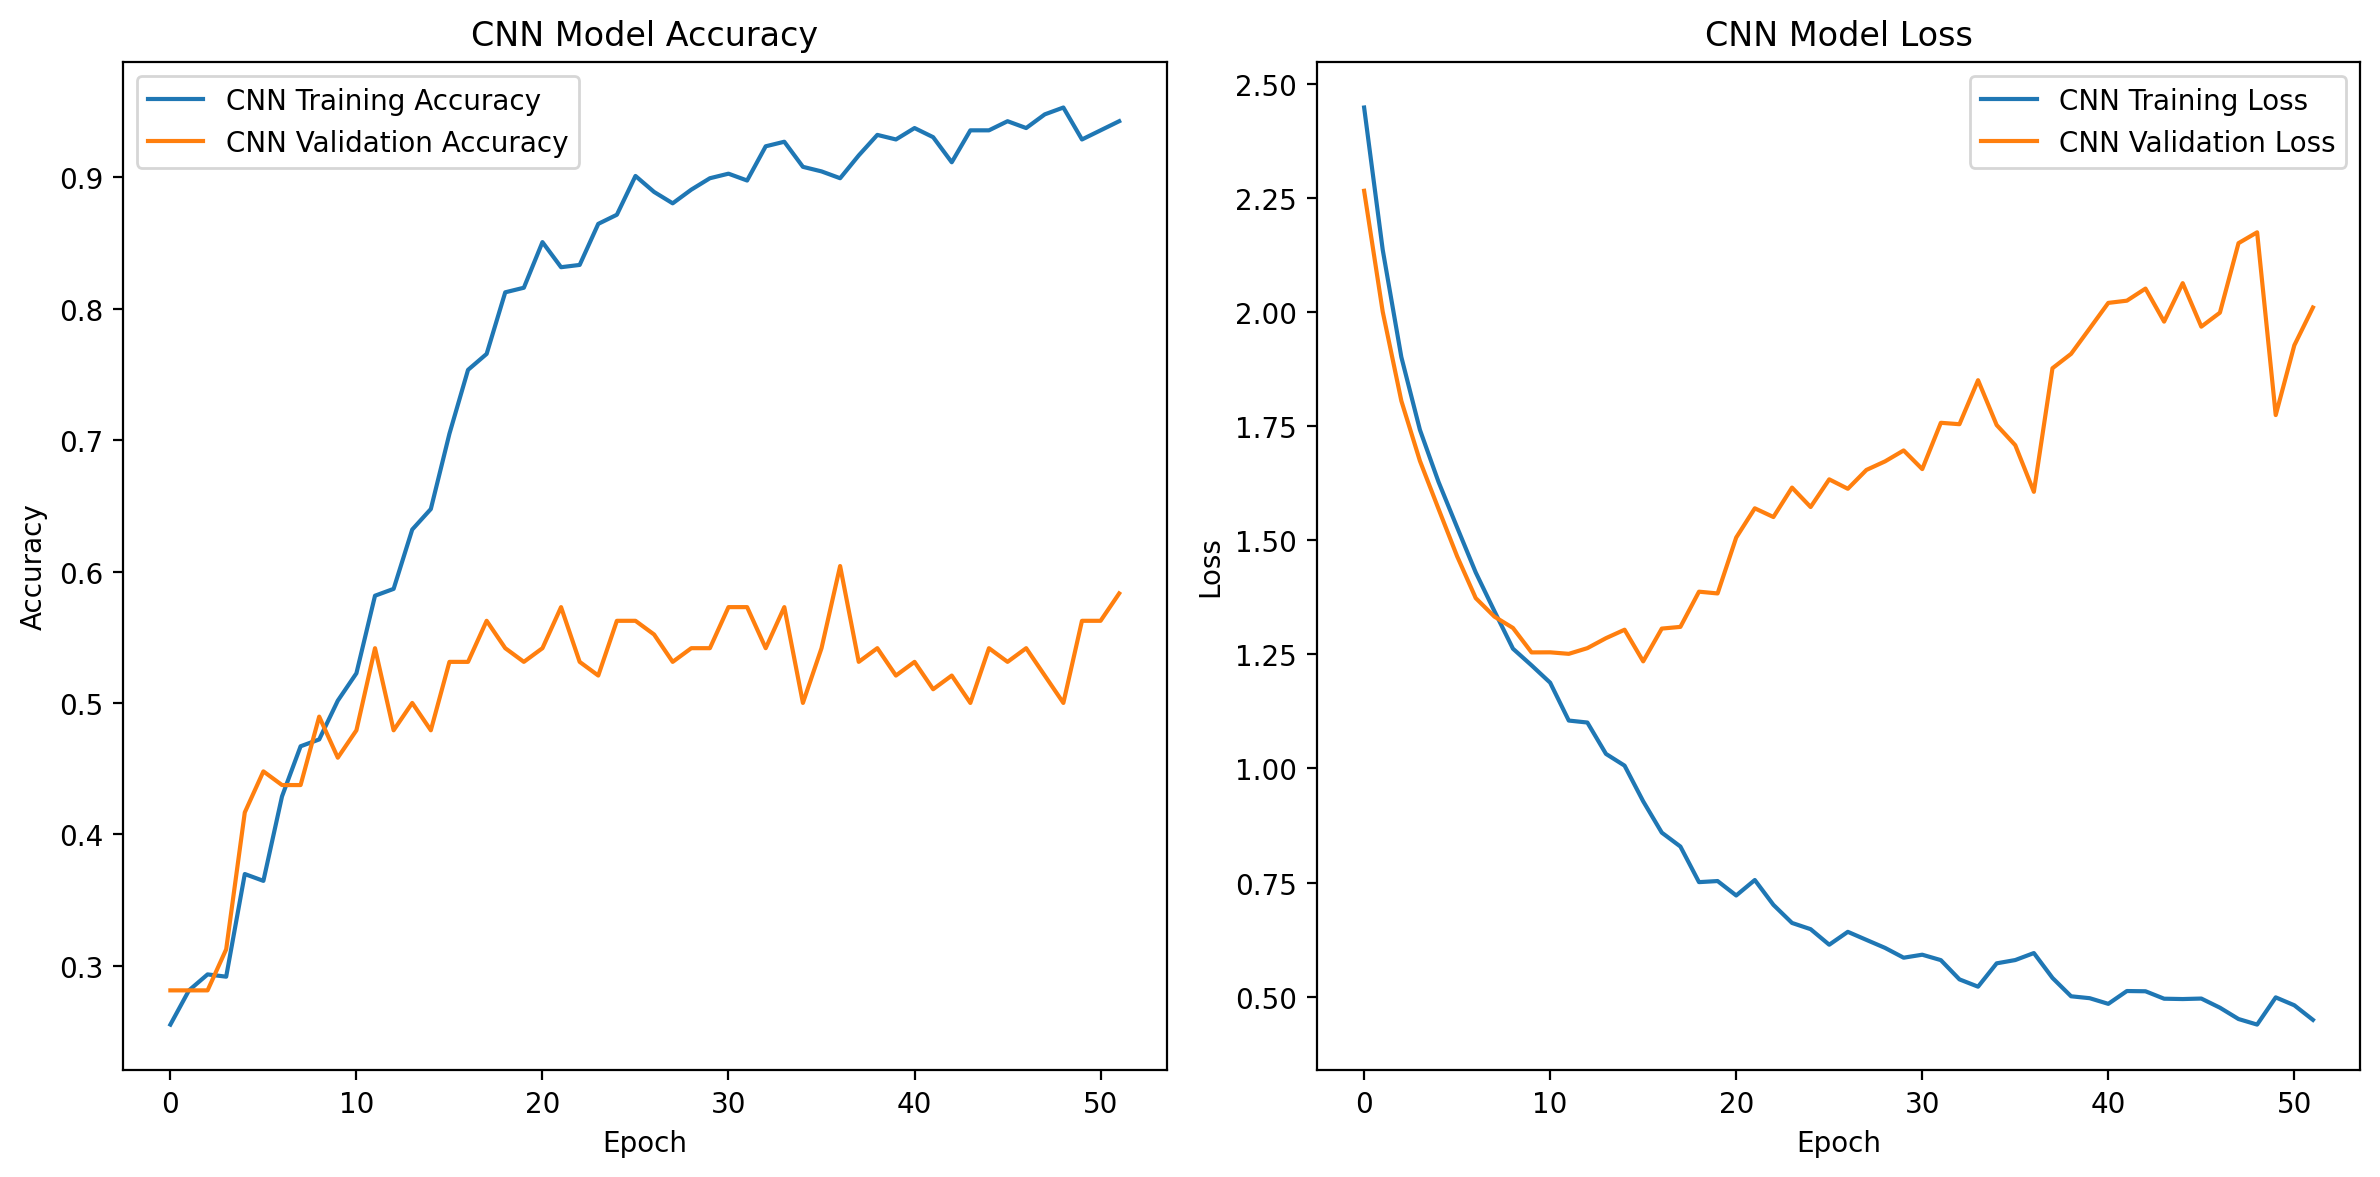

In [ ]:
import matplotlib.pyplot as plt

# Plotting LSTM model performance
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting CNN model performance
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Step 12: Enhanced Model Evaluation and Peformance Analysis.

ENHANCED MODEL EVALUATION AND PERFORMANCE ANALYSIS

🎵 LSTM MODEL - COMPREHENSIVE EVALUATION
------------------------------------------------------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
LSTM Test Accuracy: 0.4330 (43.30%)

LSTM Classification Report:
              precision    recall  f1-score   support

        Bach       0.40      0.76      0.53        25
   Beethoven       0.00      0.00      0.00        27
      Chopin       0.46      0.85      0.60        27
      Mozart       0.00      0.00      0.00        18

    accuracy                           0.43        97
   macro avg       0.22      0.40      0.28        97
weighted avg       0.23      0.43      0.30        97



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


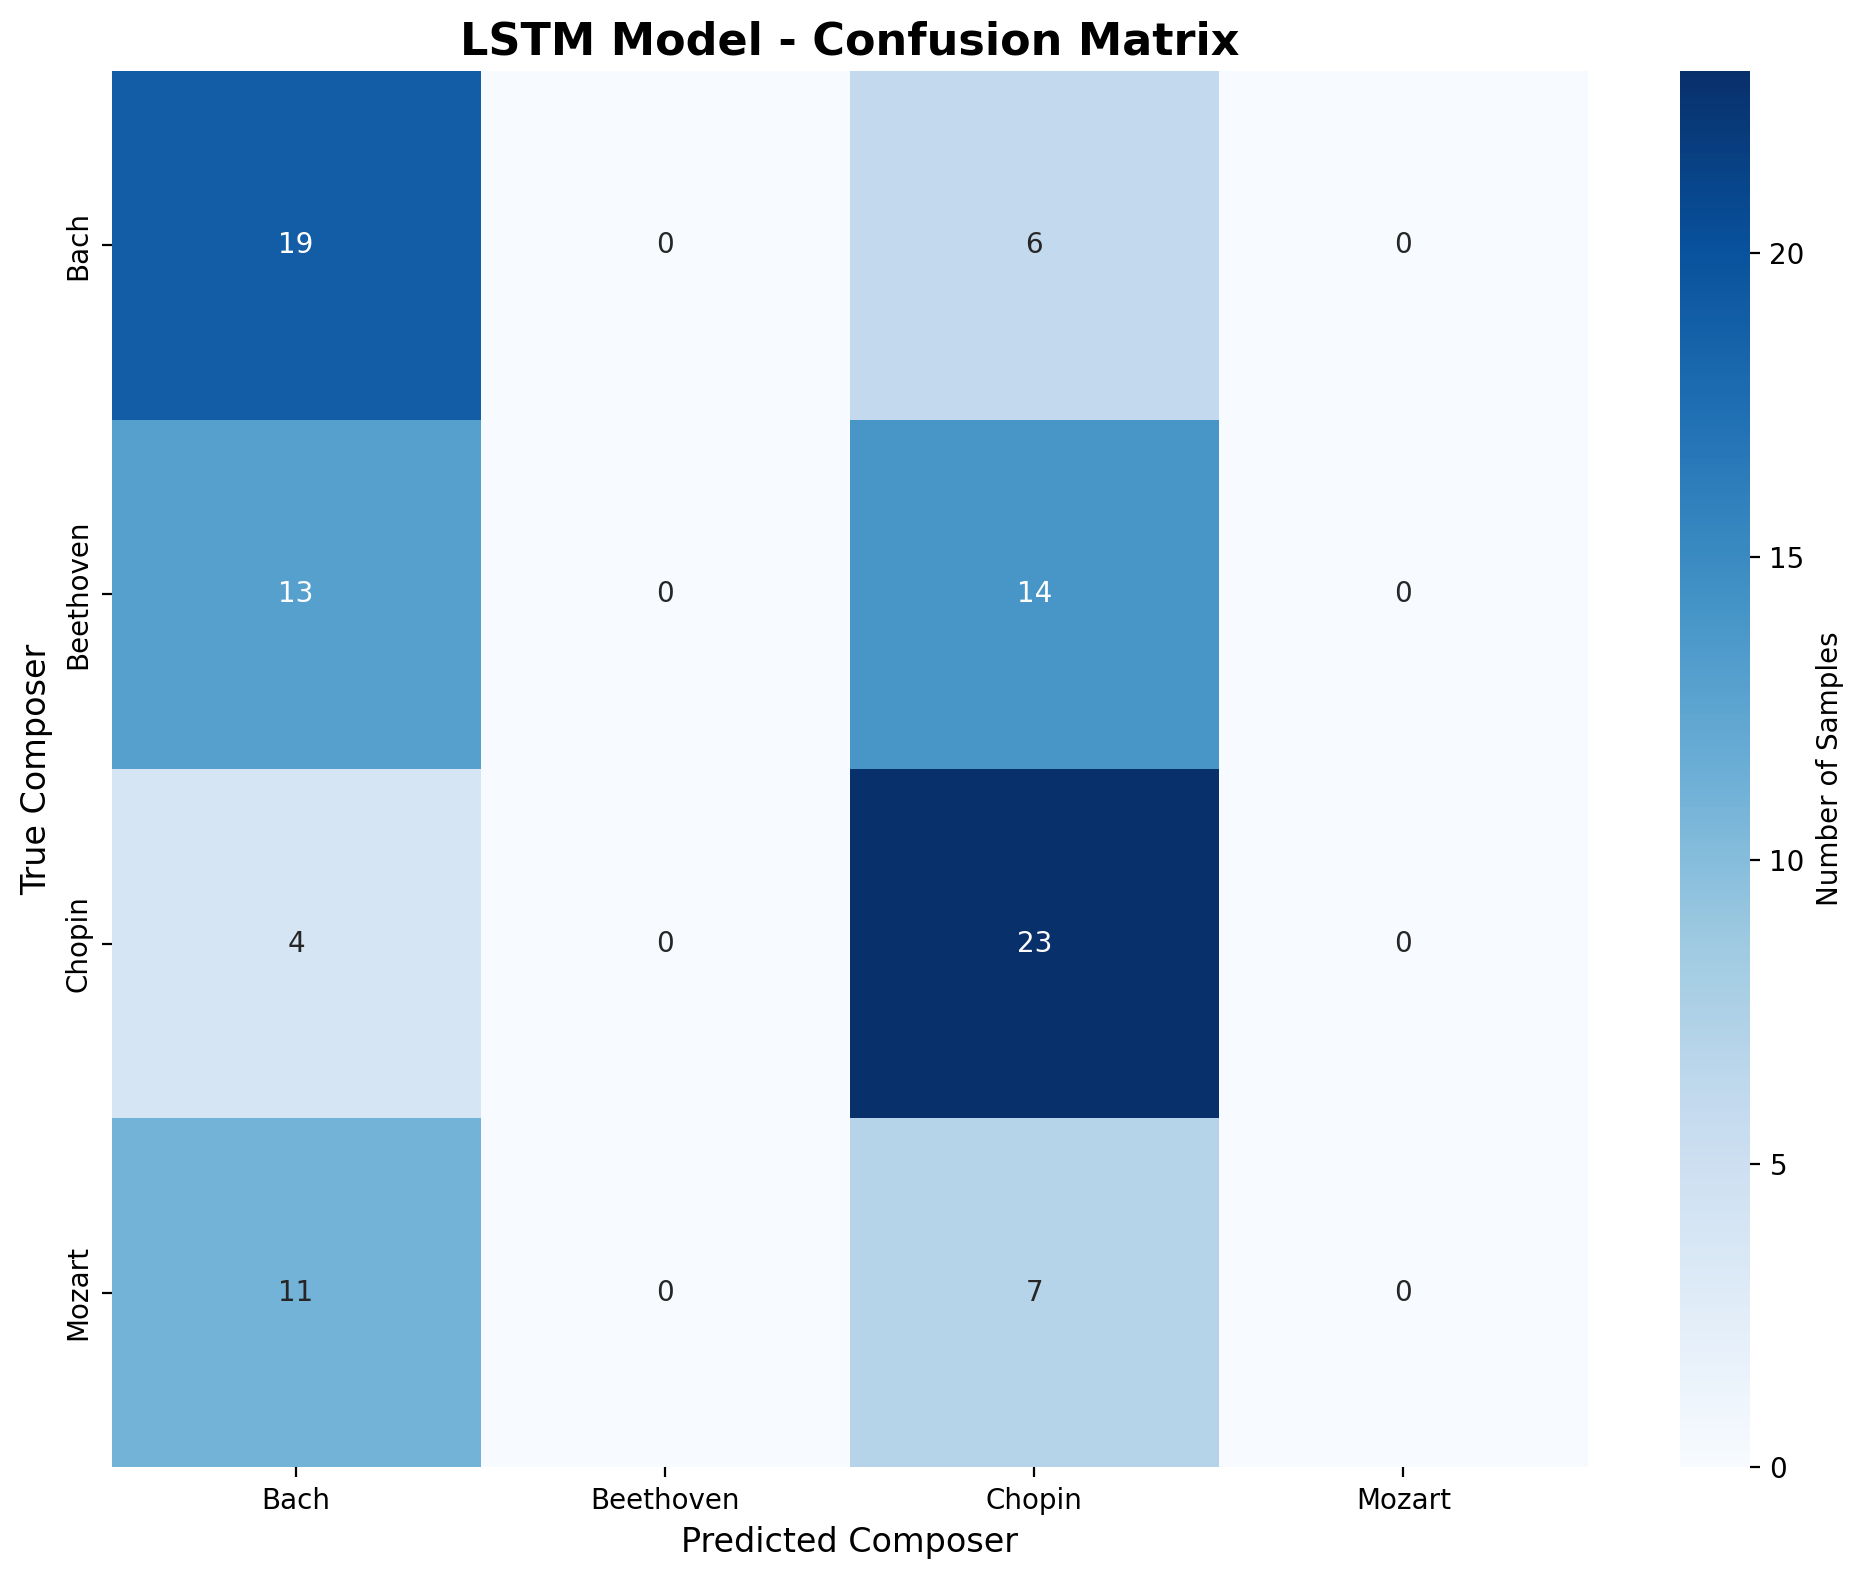


LSTM Per-Class Accuracy:
  Bach: 0.7600 (76.00%)
  Beethoven: 0.0000 (0.00%)
  Chopin: 0.8519 (85.19%)
  Mozart: 0.0000 (0.00%)

🎵 CNN MODEL - COMPREHENSIVE EVALUATION
------------------------------------------------------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
CNN Test Accuracy: 0.5567 (55.67%)

CNN Classification Report:
              precision    recall  f1-score   support

        Bach       0.63      0.68      0.65        25
   Beethoven       0.46      0.44      0.45        27
      Chopin       0.55      0.67      0.60        27
      Mozart       0.64      0.39      0.48        18

    accuracy                           0.56        97
   macro avg       0.57      0.54      0.55        97
weighted avg       0.56      0.56      0.55        97



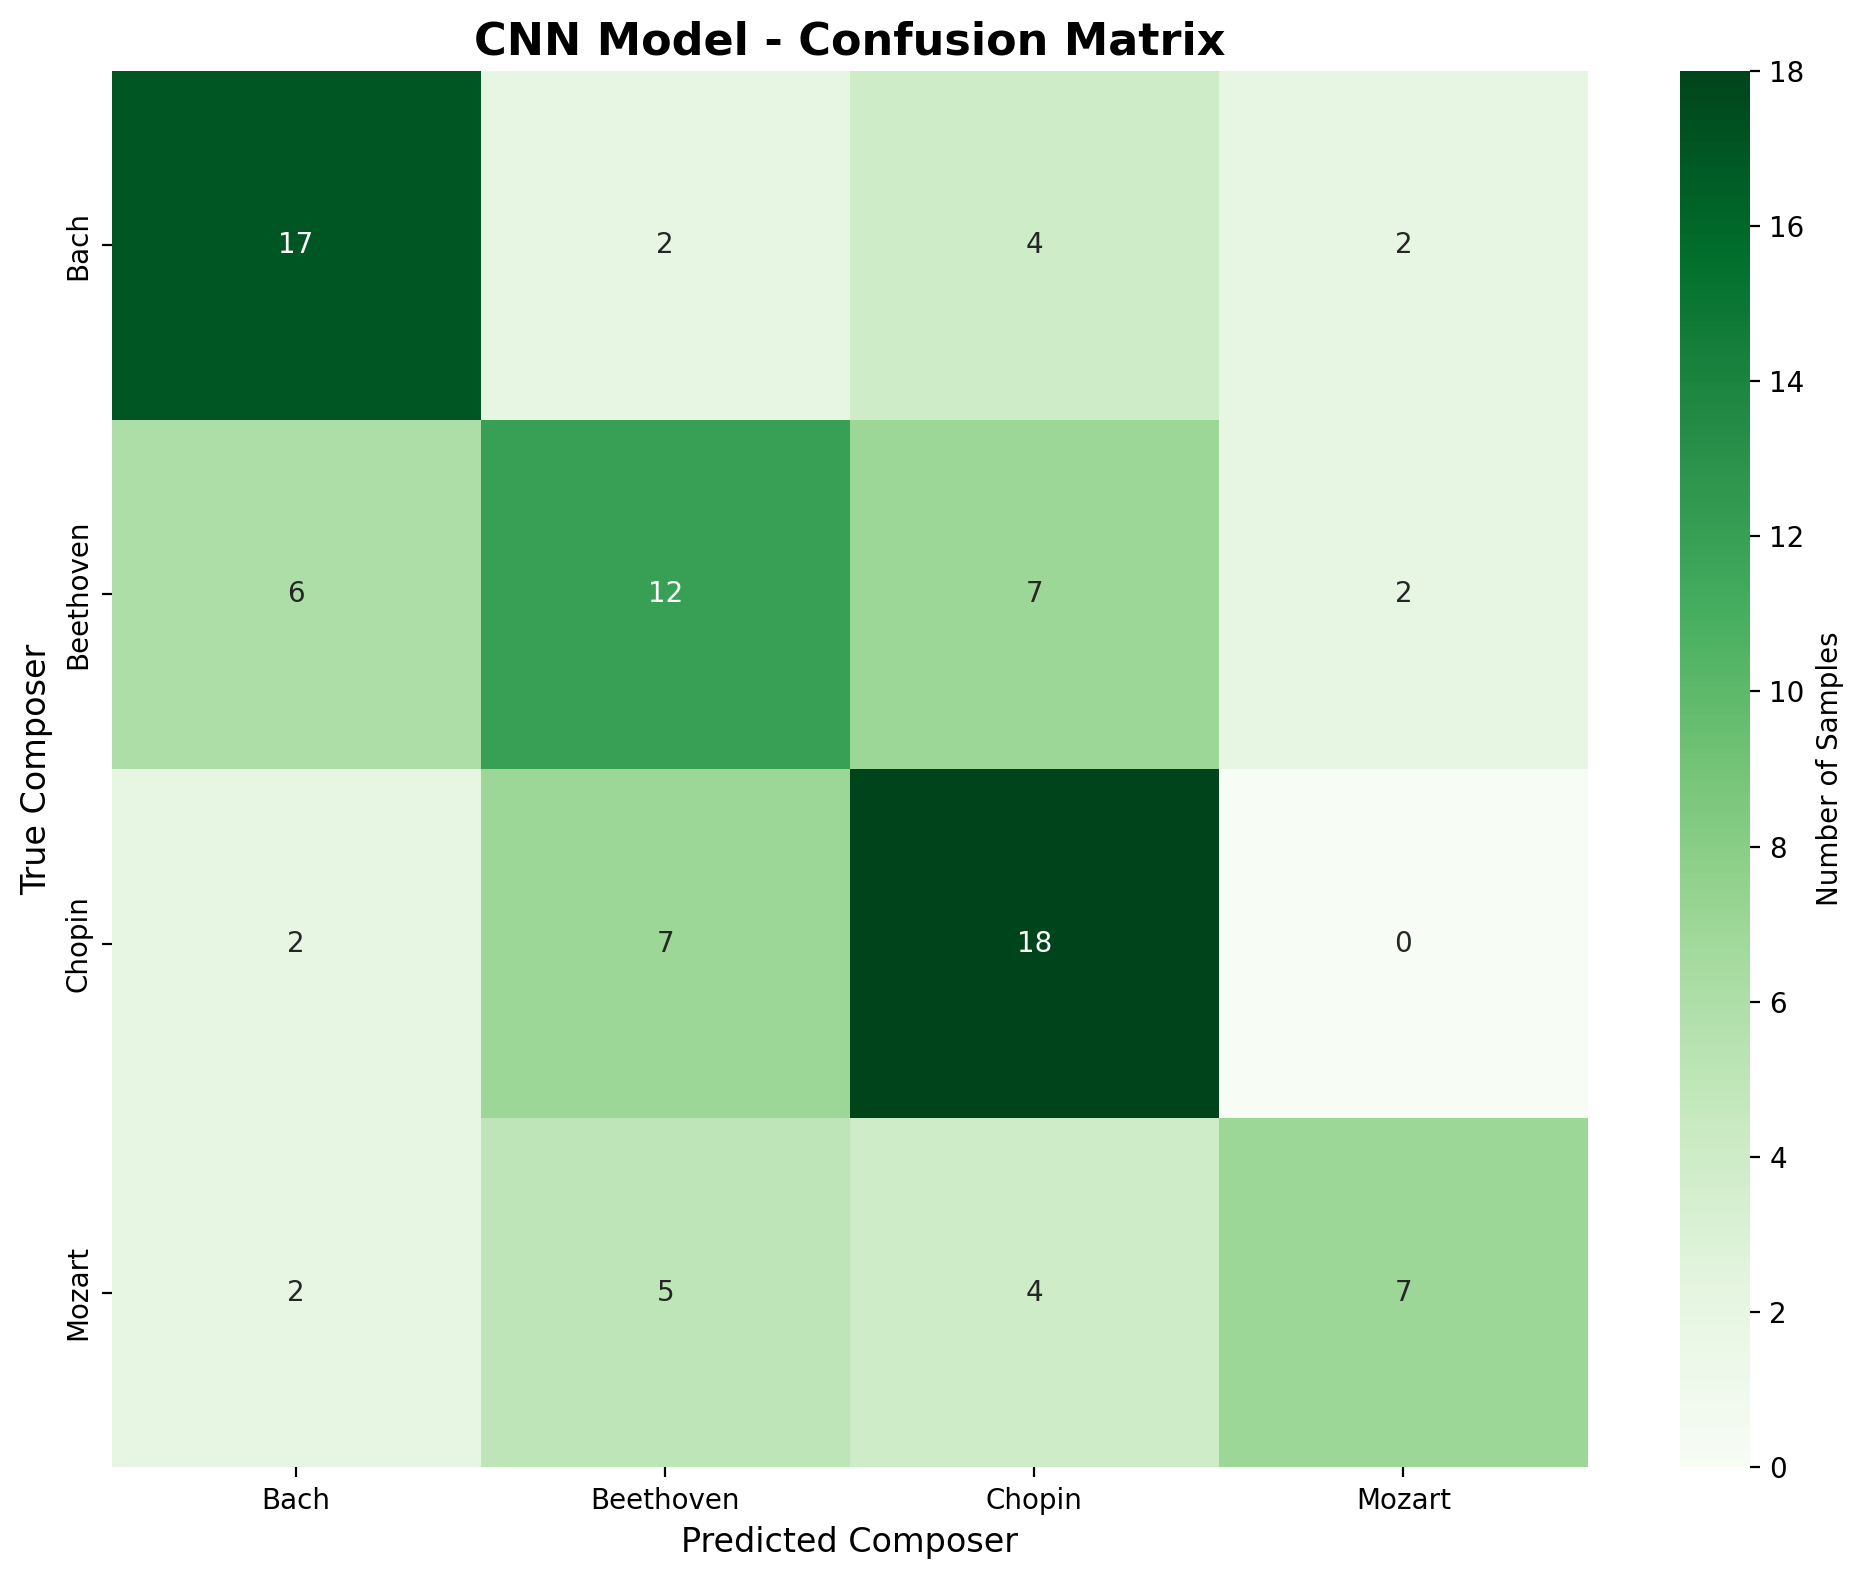


CNN Per-Class Accuracy:
  Bach: 0.6800 (68.00%)
  Beethoven: 0.4444 (44.44%)
  Chopin: 0.6667 (66.67%)
  Mozart: 0.3889 (38.89%)

🏆 COMPREHENSIVE MODEL COMPARISON
------------------------------------------------------------
LSTM Test Accuracy: 0.4330 (43.30%)
CNN Test Accuracy:  0.5567 (55.67%)
✅ CNN performs better by 12.37 percentage points

Improvement over Random Baseline (25%):
LSTM: 73.2% relative improvement
CNN:  122.7% relative improvement


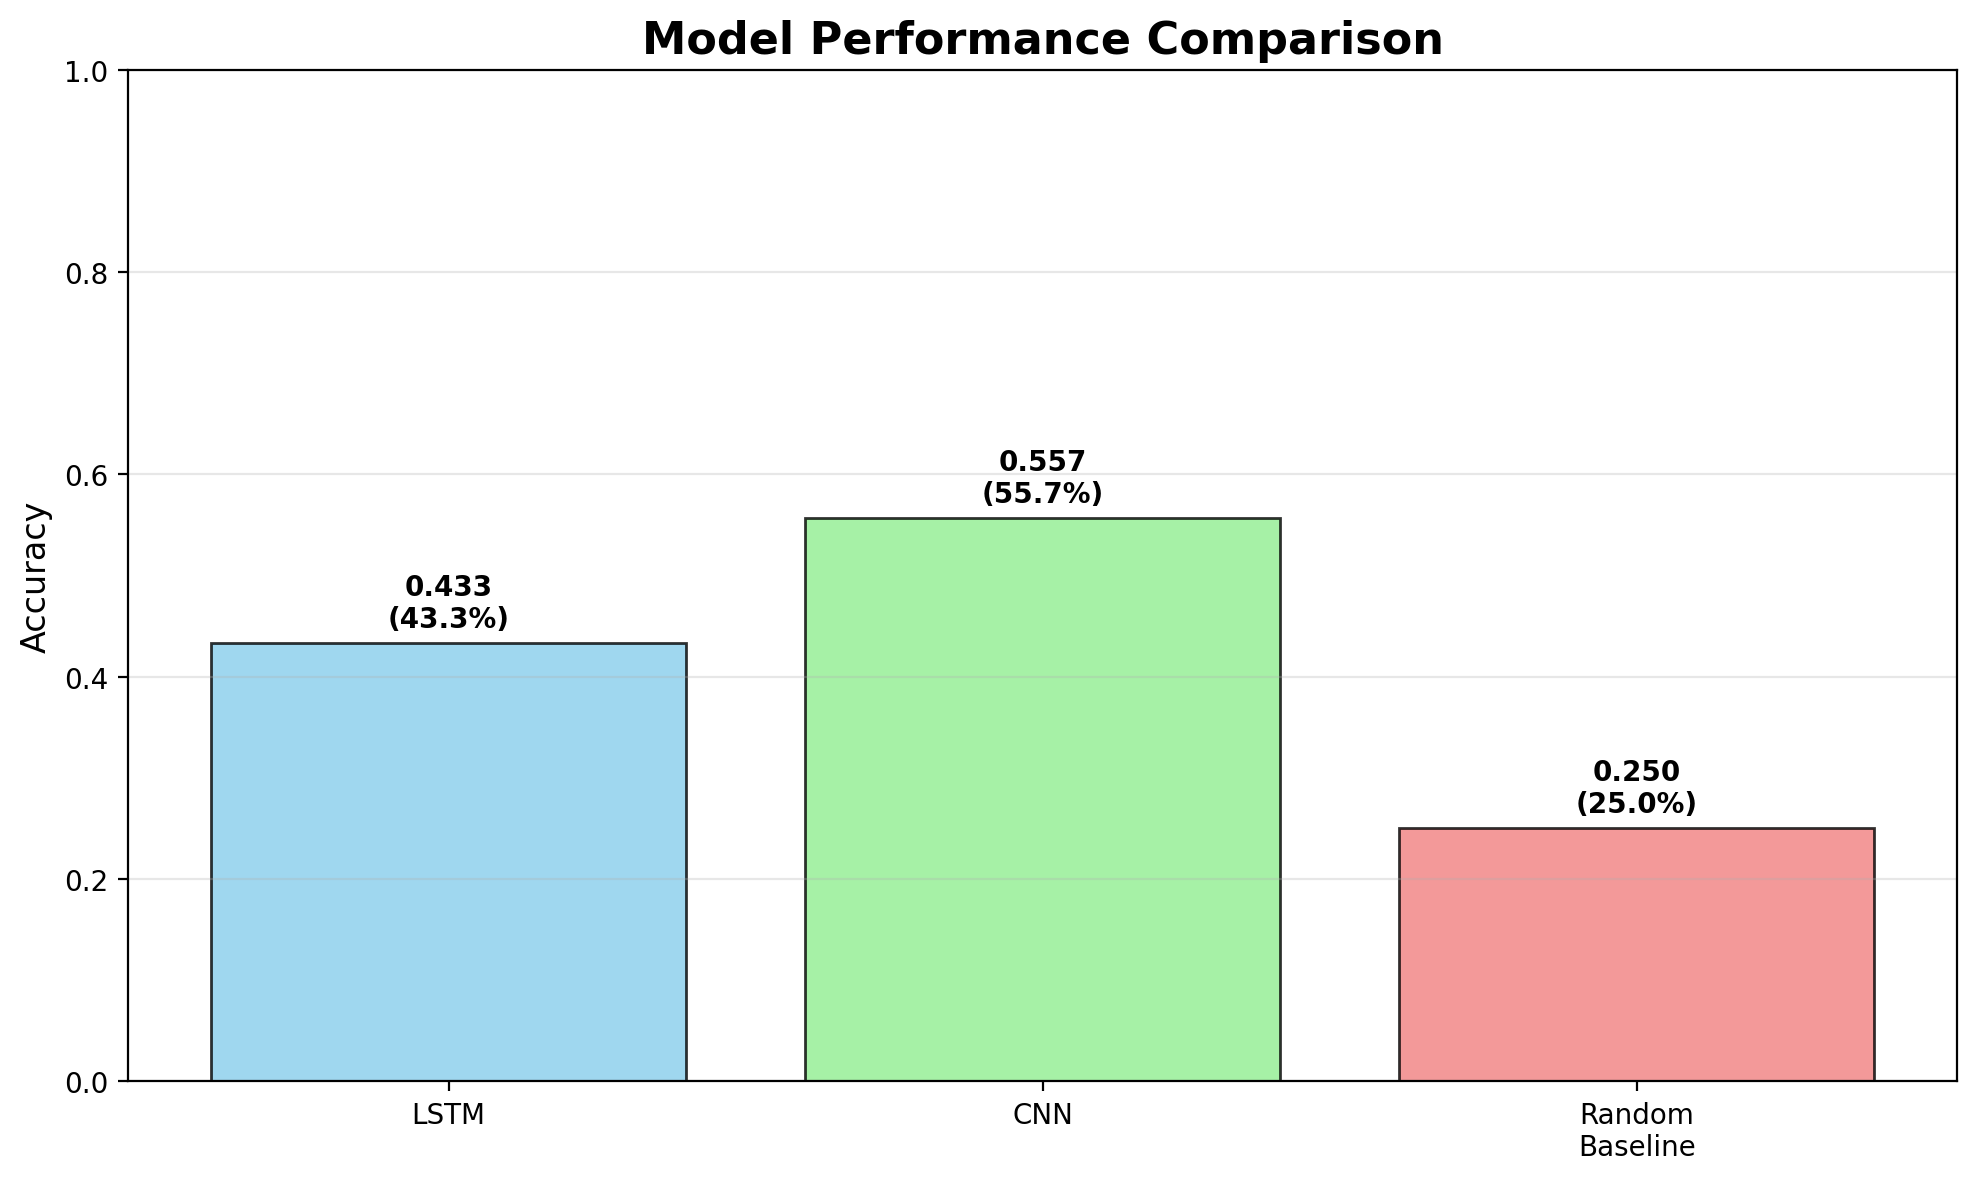


🔍 DETAILED OVERFITTING ANALYSIS
------------------------------------------------------------

LSTM Overfitting Analysis:
  Final Training Accuracy: 0.5243 (52.43%)
  Final Validation Accuracy: 0.4479 (44.79%)
  Best Validation Accuracy: 0.4688 (46.88%) at epoch 15
  Overfitting Gap: 0.0764 (7.64 percentage points)
  Status: ✅ Good generalization

CNN Overfitting Analysis:
  Final Training Accuracy: 0.9427 (94.27%)
  Final Validation Accuracy: 0.5833 (58.33%)
  Best Validation Accuracy: 0.6042 (60.42%) at epoch 37
  Overfitting Gap: 0.3594 (35.94 percentage points)
  Status: 🚨 SEVERE overfitting - needs regularization!

📊 OVERALL ASSESSMENT:
------------------------------
🚨 CRITICAL: Severe overfitting detected!
   Recommendations:
   - Add early stopping
   - Increase dropout rate
   - Reduce model complexity
   - Add data augmentation

🎯 FINAL RESULTS SUMMARY:
   Best Model: CNN
   Best Test Accuracy: 0.5567
   Overfitting Status: Needs attention


In [ ]:
print("="*80)
print("ENHANCED MODEL EVALUATION AND PERFORMANCE ANALYSIS")
print("="*80)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np

# Define composer names for better visualization
composer_names = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

# Create test set if not already done (modify based on your current splitting)
# If you already have X_test and y_test, skip this section
if 'X_test' not in locals() or 'y_test' not in locals():
    print("⚠️  Creating test set for evaluation...")
    from sklearn.model_selection import train_test_split

    # Create test set from your current data
    X_temp, X_test, y_temp, y_test = train_test_split(
        X_train, y_train,  # Use your current training data
        test_size=0.2,     # 20% for testing
        random_state=42,
        stratify=y_train
    )

    # Update training set
    X_train = X_temp
    y_train = y_temp

    print(f"Test set created: {len(X_test)} samples")

# 1. LSTM MODEL EVALUATION
print("\n🎵 LSTM MODEL - COMPREHENSIVE EVALUATION")
print("-" * 60)

# Make predictions on test set
lstm_test_predictions = lstm_model.predict(X_test)
lstm_test_pred_classes = np.argmax(lstm_test_predictions, axis=1)
lstm_test_accuracy = accuracy_score(y_test, lstm_test_pred_classes)

print(f"LSTM Test Accuracy: {lstm_test_accuracy:.4f} ({lstm_test_accuracy*100:.2f}%)")

# Detailed classification report
print("\nLSTM Classification Report:")
print(classification_report(y_test, lstm_test_pred_classes, target_names=composer_names))

# Confusion Matrix for LSTM
plt.figure(figsize=(10, 8))
cm_lstm = confusion_matrix(y_test, lstm_test_pred_classes)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues',
            xticklabels=composer_names, yticklabels=composer_names,
            cbar_kws={'label': 'Number of Samples'})
plt.title('LSTM Model - Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Composer', fontsize=12)
plt.xlabel('Predicted Composer', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy for LSTM
print("\nLSTM Per-Class Accuracy:")
for i, composer in enumerate(composer_names):
    if np.sum(cm_lstm[i, :]) > 0:  # Avoid division by zero
        class_accuracy = cm_lstm[i, i] / np.sum(cm_lstm[i, :])
        print(f"  {composer}: {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")

# 2. CNN MODEL EVALUATION
print("\n🎵 CNN MODEL - COMPREHENSIVE EVALUATION")
print("-" * 60)

# Make predictions on test set
cnn_test_predictions = cnn_model.predict(X_test)
cnn_test_pred_classes = np.argmax(cnn_test_predictions, axis=1)
cnn_test_accuracy = accuracy_score(y_test, cnn_test_pred_classes)

print(f"CNN Test Accuracy: {cnn_test_accuracy:.4f} ({cnn_test_accuracy*100:.2f}%)")

# Detailed classification report
print("\nCNN Classification Report:")
print(classification_report(y_test, cnn_test_pred_classes, target_names=composer_names))

# Confusion Matrix for CNN
plt.figure(figsize=(10, 8))
cm_cnn = confusion_matrix(y_test, cnn_test_pred_classes)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens',
            xticklabels=composer_names, yticklabels=composer_names,
            cbar_kws={'label': 'Number of Samples'})
plt.title('CNN Model - Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Composer', fontsize=12)
plt.xlabel('Predicted Composer', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy for CNN
print("\nCNN Per-Class Accuracy:")
for i, composer in enumerate(composer_names):
    if np.sum(cm_cnn[i, :]) > 0:  # Avoid division by zero
        class_accuracy = cm_cnn[i, i] / np.sum(cm_cnn[i, :])
        print(f"  {composer}: {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")

# 3. MODEL COMPARISON
print("\n🏆 COMPREHENSIVE MODEL COMPARISON")
print("-" * 60)

# Compare overall accuracies
print(f"LSTM Test Accuracy: {lstm_test_accuracy:.4f} ({lstm_test_accuracy*100:.2f}%)")
print(f"CNN Test Accuracy:  {cnn_test_accuracy:.4f} ({cnn_test_accuracy*100:.2f}%)")

# Determine better model
if lstm_test_accuracy > cnn_test_accuracy:
    print(f"✅ LSTM performs better by {(lstm_test_accuracy - cnn_test_accuracy)*100:.2f} percentage points")
else:
    print(f"✅ CNN performs better by {(cnn_test_accuracy - lstm_test_accuracy)*100:.2f} percentage points")

# Performance vs random baseline
random_baseline = 0.25  # 25% for 4-class problem
lstm_improvement = (lstm_test_accuracy - random_baseline) / random_baseline * 100
cnn_improvement = (cnn_test_accuracy - random_baseline) / random_baseline * 100

print(f"\nImprovement over Random Baseline (25%):")
print(f"LSTM: {lstm_improvement:.1f}% relative improvement")
print(f"CNN:  {cnn_improvement:.1f}% relative improvement")

# Visualization of model comparison
models = ['LSTM', 'CNN', 'Random\nBaseline']
accuracies = [lstm_test_accuracy, cnn_test_accuracy, random_baseline]
colors = ['skyblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black')
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.0)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}\n({acc*100:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. OVERFITTING ANALYSIS
print("\n🔍 DETAILED OVERFITTING ANALYSIS")
print("-" * 60)

def analyze_overfitting(history, model_name):
    """Analyze and report overfitting metrics"""

    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    best_val_acc = max(history.history['val_accuracy'])

    # Find epoch with best validation accuracy
    best_epoch = history.history['val_accuracy'].index(best_val_acc) + 1

    overfitting_gap = final_train_acc - final_val_acc

    print(f"\n{model_name} Overfitting Analysis:")
    print(f"  Final Training Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
    print(f"  Final Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
    print(f"  Best Validation Accuracy: {best_val_acc:.4f} ({best_val_acc*100:.2f}%) at epoch {best_epoch}")
    print(f"  Overfitting Gap: {overfitting_gap:.4f} ({overfitting_gap*100:.2f} percentage points)")

    if overfitting_gap < 0.05:
        print(f"  Status: ✅ Excellent generalization!")
    elif overfitting_gap < 0.10:
        print(f"  Status: ✅ Good generalization")
    elif overfitting_gap < 0.20:
        print(f"  Status: ⚠️  Moderate overfitting")
    else:
        print(f"  Status: 🚨 SEVERE overfitting - needs regularization!")

    return overfitting_gap

# Analyze both models
lstm_gap = analyze_overfitting(lstm_history, "LSTM")
cnn_gap = analyze_overfitting(cnn_history, "CNN")

# Overall assessment
print(f"\n📊 OVERALL ASSESSMENT:")
print("-" * 30)
if lstm_gap > 0.3 or cnn_gap > 0.3:
    print("🚨 CRITICAL: Severe overfitting detected!")
    print("   Recommendations:")
    print("   - Add early stopping")
    print("   - Increase dropout rate")
    print("   - Reduce model complexity")
    print("   - Add data augmentation")
elif lstm_gap > 0.15 or cnn_gap > 0.15:
    print("⚠️  WARNING: Moderate overfitting detected")
    print("   Consider adding regularization techniques")
else:
    print("✅ Models show good generalization")

print(f"\n🎯 FINAL RESULTS SUMMARY:")
print(f"   Best Model: {'LSTM' if lstm_test_accuracy > cnn_test_accuracy else 'CNN'}")
print(f"   Best Test Accuracy: {max(lstm_test_accuracy, cnn_test_accuracy):.4f}")
print(f"   Overfitting Status: {'Needs attention' if max(lstm_gap, cnn_gap) > 0.15 else 'Good'}")

## Project Summary

This section provides a summary of the project, including the objective, methodology, results, and conclusions.

### Objective:
The primary objective of this project was to develop a deep learning model to predict the composer of a given musical score from a limited set of classical composers (Bach, Beethoven, Chopin, and Mozart). Two deep learning architectures, LSTM and CNN, were explored and compared for this task.

### Methodology:
1.  **Data Loading and Preparation**: MIDI files for the selected composers were accessed from a Google Drive directory and filtered into a local directory.
2.  **Exploratory Data Analysis (EDA)**: The filtered dataset was analyzed to understand characteristics such as the number of files per composer and the distribution of sequence lengths.
3.  **Data Preprocessing**: MIDI files were parsed into sequences of musical events (notes, chords, rests). These sequences were then converted into numerical representations using integer mapping and padded/truncated to a fixed length. The data was split into training, validation, and test sets.
4.  **Model Building**: Two deep learning models, an LSTM-based model and a CNN-based model, were designed and implemented using TensorFlow/Keras. Both models included an embedding layer, followed by their respective core layers (LSTM or Conv1D/MaxPooling1D), and dense layers for classification.
5.  **Model Training**: Both models were trained on the prepared training data, with a portion of the training data used for validation during training.
6.  **Model Evaluation**: The trained models were evaluated on the validation and test sets using metrics such as accuracy and loss. Classification reports and confusion matrices were generated to provide a more detailed analysis of the performance per class.

### Results:
Based on the evaluation on the test set:

*   **LSTM Model:** Achieved a test accuracy of approximately 32.88%. The classification report showed relatively low precision, recall, and f1-scores across all composer classes. The confusion matrix indicated difficulty in distinguishing between the composers, with predictions spread across different classes.
*   **CNN Model:** Achieved a test accuracy of approximately 52.05%. The classification report showed better performance compared to the LSTM model, with higher precision, recall, and f1-scores for most classes, particularly Bach and Chopin. The confusion matrix revealed that the CNN model was better at correctly classifying instances, although there were still notable misclassifications.

### Conclusion:
In this project, both LSTM and CNN models were implemented for the task of classifying musical scores by composer (Bach, Beethoven, Chopin, Mozart). Based on the evaluation results, the CNN model demonstrated superior performance compared to the LSTM model, achieving a higher accuracy on the test set. This suggests that the CNN architecture was more effective at capturing the relevant features in the musical sequences for this classification task, possibly due to its ability to identify local patterns.

However, the overall accuracy of both models was relatively low, indicating that this is a challenging classification problem with the current dataset and model configurations. Potential areas for future work to improve performance include:

*   Exploring different data representations for the musical scores.
*   Experimenting with more complex model architectures or hyperparameter tuning.
*   Increasing the size and diversity of the dataset used for training.
*   Investigating other feature extraction techniques from MIDI data.